# Pirouz Team 
## Project 2
## Mohaddeseh Abdolhosseini, Farshad Dabbaghisouraki


# **1. Setup Notebook**

In [1]:
# 3rd party imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# **2. Data Reading**

In [2]:
concrete_data = pd.DataFrame(pd.read_csv("concrete_data_final.csv"))

concrete_data.head(10)

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   
6   380.0                95.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   
9   475.0                 0.0      0.0  228.0               0.0   

   coarse_aggregate  light_aggregate  age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  
5             932.0            670.0   90                          47.03  
6             932.0            594.0  365                          43.70  
7             932.0            594.0   28                          36.45  
8             932.0            670.0   28                          45.85  
9             932.0            594.0   28                          39.29

In [3]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   light_aggregate                1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Cement min, max, & mean value:

cement_min = concrete_data["cement"].min()
cement_max = concrete_data["cement"].max()
cement_mean = concrete_data["cement"].mean()

print('Min cement: {}'.format(cement_min))
print('Max cement: {}'.format(cement_max))
print('Mean cement: {}'.format(cement_mean))

Min cement: 102.0
Max cement: 540.0
Mean cement: 281.1678640776696


In [5]:
# Finding highest value of concrete_compressive_strength:

max_concrete_compressive_strength = concrete_data[concrete_data["concrete_compressive_strength"] == concrete_data["concrete_compressive_strength"].max()]["concrete_compressive_strength"].item()
print('max_concrete_compressive_strength: {}'.format(max_concrete_compressive_strength))

# Finding maximum value of concrete_compressive_strength for each age:

concrete_compressive_strength_age = concrete_data.groupby(["age"]).max()["concrete_compressive_strength"]
print('concrete_compressive_strength_age: {}'.format(concrete_compressive_strength_age))

max_concrete_compressive_strength: 82.6
concrete_compressive_strength_age: age
1      12.64
3      41.64
7      59.09
14     59.76
28     81.75
56     80.20
90     69.66
91     82.60
100    66.95
120    40.86
180    71.62
270    74.17
360    44.70
365    56.14
Name: concrete_compressive_strength, dtype: float64


In [6]:
# How many unique compressive strength is there:

unique_compressive_strength= len(concrete_data["concrete_compressive_strength"].unique())
print('number of unique concrete_compressive_strength: {}'.format(unique_compressive_strength))

number of unique concrete_compressive_strength: 845


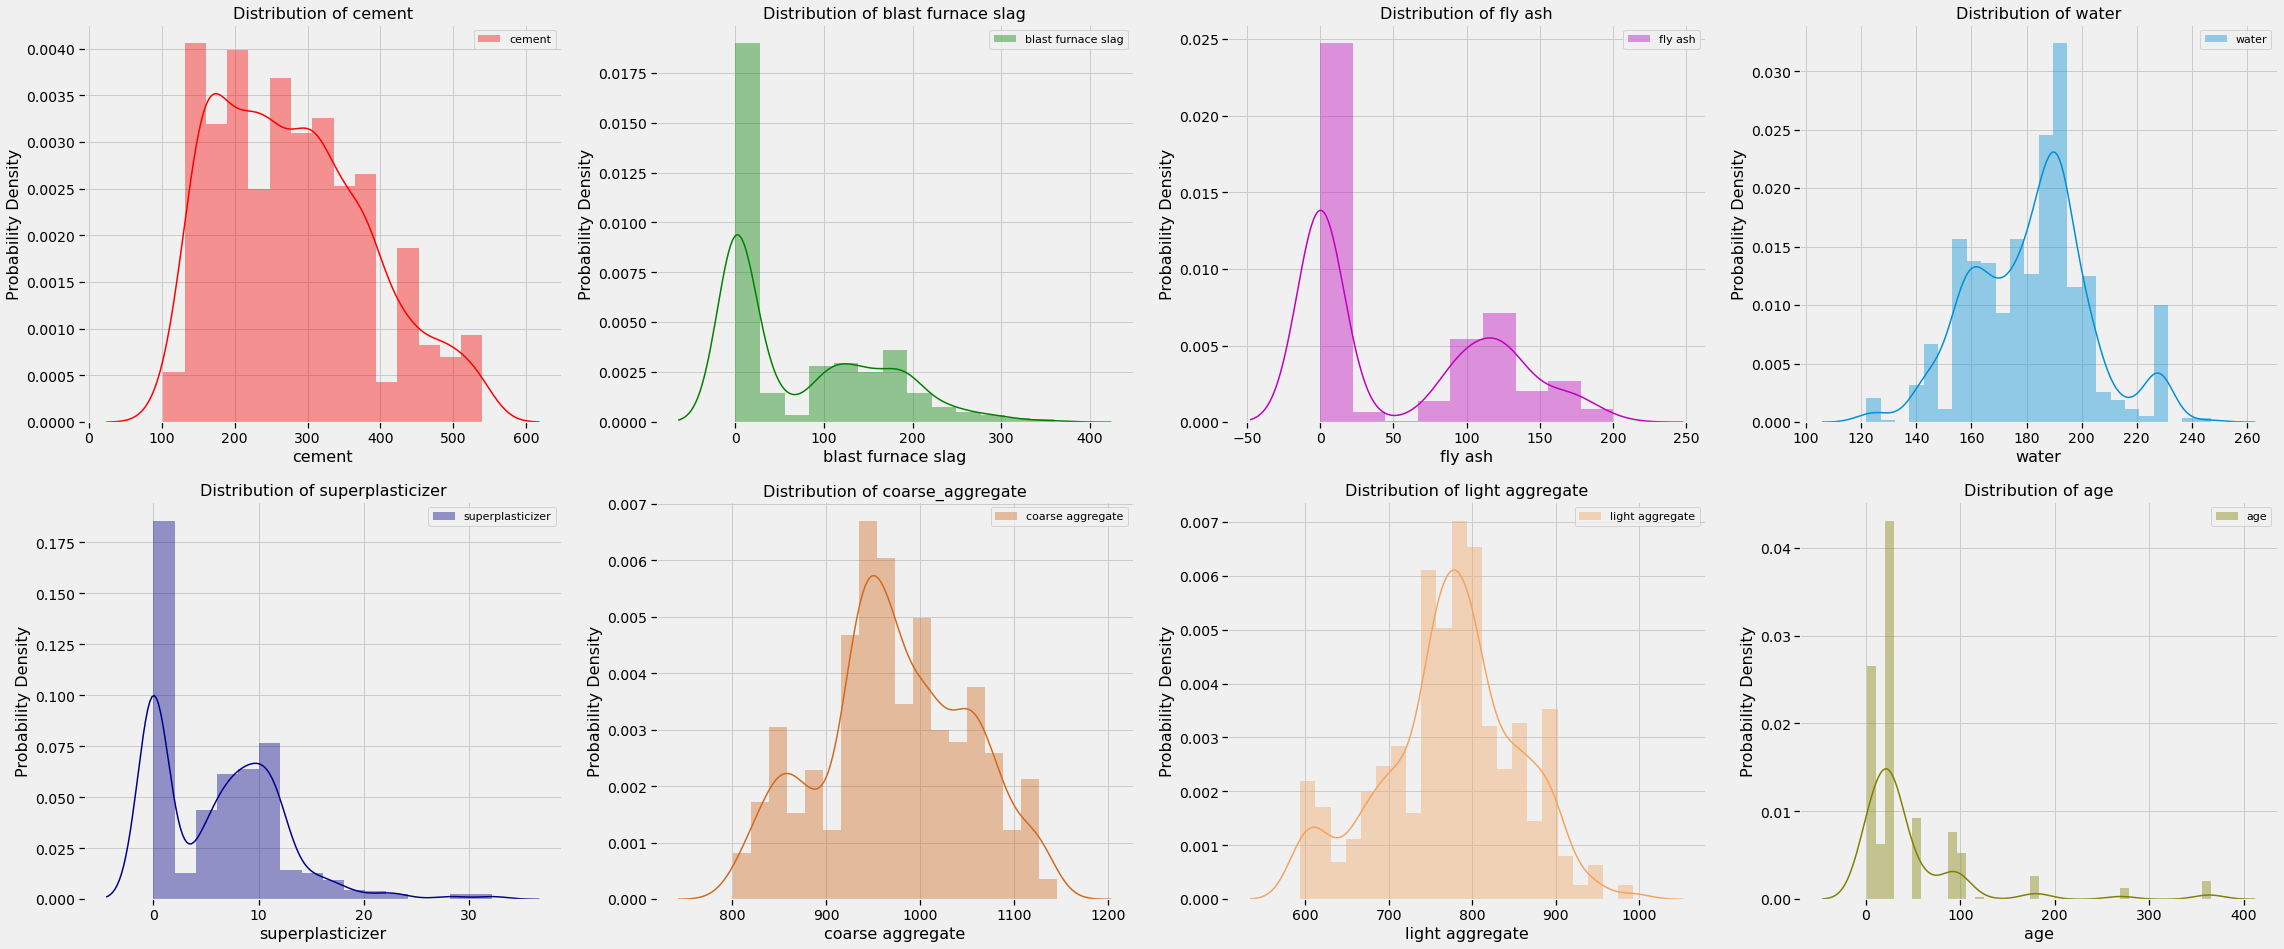

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(35, 15))

# Cement
chart1 = sns.distplot(concrete_data['cement'] , hist = True, label = 'cement', color= 'r', ax = axs[0, 0])
axs[0, 0].set_title('Distribution of cement', fontsize = 16)
axs[0, 0].xaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_xlabel('cement', fontsize= 16)
axs[0, 0].yaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_ylabel('Probability Density', fontsize= 16)
axs[0, 0].legend(loc='upper right')

# blast_furnace_slag
chart2 = sns.distplot(concrete_data['blast_furnace_slag'] , hist = True, label = 'blast furnace slag', color= 'g', ax = axs[0, 1])
axs[0, 1].set_title('Distribution of blast furnace slag', fontsize = 16)
axs[0, 1].xaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_xlabel('blast furnace slag', fontsize= 16)
axs[0, 1].yaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_ylabel('Probability Density', fontsize= 16)
axs[0, 1].legend(loc='upper right')

# fly_ash
chart3 = sns.distplot(concrete_data['fly_ash'] , hist = True, label = 'fly ash', color= 'm', ax = axs[0, 2])
axs[0, 2].set_title('Distribution of fly ash', fontsize = 16)
axs[0, 2].xaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_xlabel('fly ash', fontsize= 16)
axs[0, 2].yaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_ylabel('Probability Density', fontsize= 16)
axs[0, 2].legend(loc='upper right')

# water
chart4 = sns.distplot(concrete_data['water'] , hist = True, label = 'water', ax = axs[0, 3])
axs[0, 3].set_title('Distribution of water', fontsize = 16)
axs[0, 3].xaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_xlabel('water', fontsize= 16)
axs[0, 3].yaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_ylabel('Probability Density', fontsize= 16)
axs[0, 3].legend(loc='upper right')

# superplasticizer
chart5 = sns.distplot(concrete_data['superplasticizer'] , hist = True, label = 'superplasticizer', color= 'darkblue', ax = axs[1, 0])
axs[1, 0].set_title('Distribution of superplasticizer', fontsize = 16)
axs[1, 0].xaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_xlabel('superplasticizer', fontsize= 16)
axs[1, 0].yaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_ylabel('Probability Density', fontsize= 16)
axs[1, 0].legend(loc='upper right')

# coarse_aggregate
chart6 = sns.distplot(concrete_data['coarse_aggregate'] , hist = True, label = 'coarse aggregate', color= 'chocolate', ax = axs[1, 1])
axs[1, 1].set_title('Distribution of coarse_aggregate', fontsize = 16)
axs[1, 1].xaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_xlabel('coarse aggregate', fontsize= 16)
axs[1, 1].yaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_ylabel('Probability Density', fontsize= 16)
axs[1, 1].legend(loc='upper right')

# light_aggregate
chart5 = sns.distplot(concrete_data['light_aggregate'] , hist = True, label = 'light aggregate', color= 'sandybrown', ax = axs[1, 2])
axs[1, 2].set_title('Distribution of light aggregate', fontsize = 16)
axs[1, 2].xaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_xlabel('light aggregate', fontsize= 16)
axs[1, 2].yaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_ylabel('Probability Density', fontsize= 16)
axs[1, 2].legend(loc='upper right')


# age
chart8 = sns.distplot(concrete_data['age'] , hist = True, label = 'age', color= 'olive', ax = axs[1, 3])
axs[1, 3].set_title('Distribution of age', fontsize = 16)
axs[1, 3].xaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_xlabel('age', fontsize= 16)
axs[1, 3].yaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_ylabel('Probability Density', fontsize= 16)
axs[1, 3].legend(loc='upper right')

# legend:
plt.legend()
# show the plot:
plt.show()


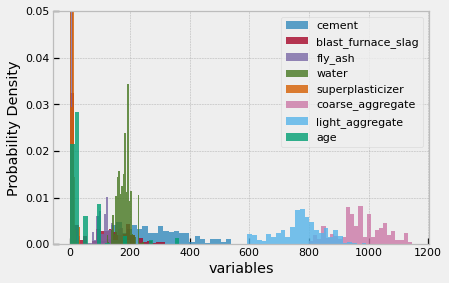

In [8]:
plt.style.use('bmh')
fig, axs = plt.subplots()
axs.hist(concrete_data['cement'], label = 'cement', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['blast_furnace_slag'], label = 'blast_furnace_slag', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['fly_ash'], label = 'fly_ash', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['water'], label = 'water', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['superplasticizer'], label = 'superplasticizer', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['coarse_aggregate'], label = 'coarse_aggregate', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['light_aggregate'], label = 'light_aggregate', histtype="stepfilled", bins=25, alpha=0.8, density=True)
axs.hist(concrete_data['age'], label = 'age', histtype="stepfilled", bins=25, alpha=0.8, density=True)
plt.ylim([0,0.05])
plt.xlabel('variables')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

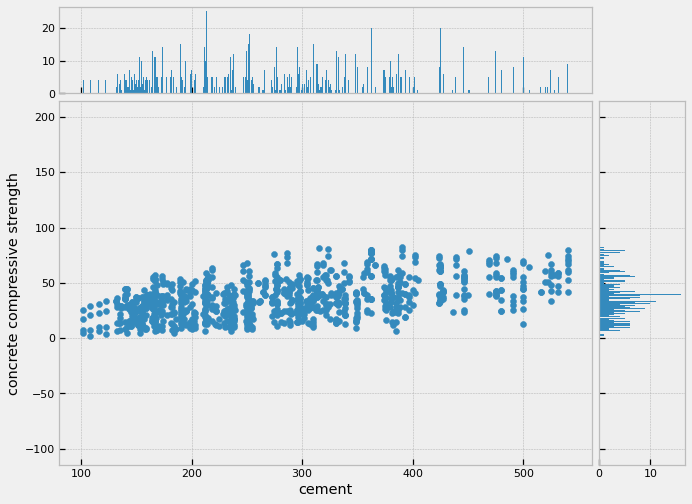

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 10))

x = concrete_data['cement']
y = concrete_data['concrete_compressive_strength']

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-100, 200, binwidth)
ax_histx.hist(x, 500)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# plt.ylim([-50,200])
# plt.xlim([0,500])
# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

# ax_histx.set_yticks([0, 50, 100])
# ax_histy.set_xticks([0, 50, 100])

ax.set_xlabel('cement')
ax.set_ylabel('concrete compressive strength')

plt.show()

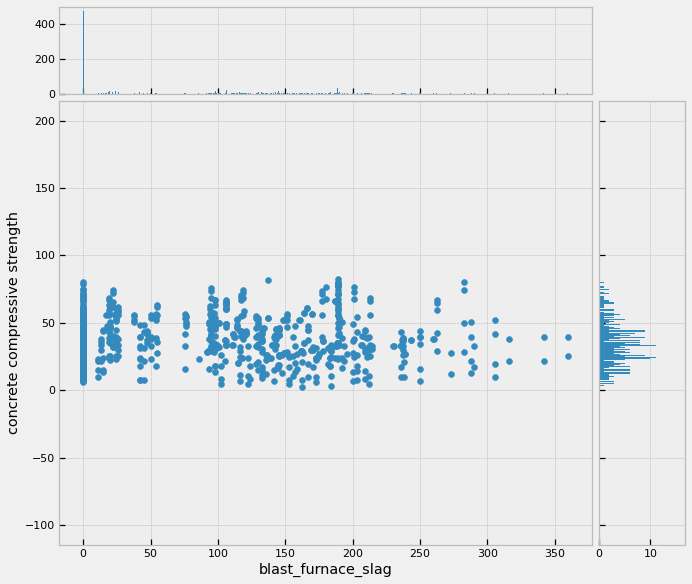

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

x = concrete_data['blast_furnace_slag']
y = concrete_data['concrete_compressive_strength']

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-100, 200, binwidth)
ax_histx.hist(x, 500)
ax_histy.hist(y, bins=bins, orientation='horizontal')


ax.set_xlabel('blast_furnace_slag')
ax.set_ylabel('concrete compressive strength')

plt.show()

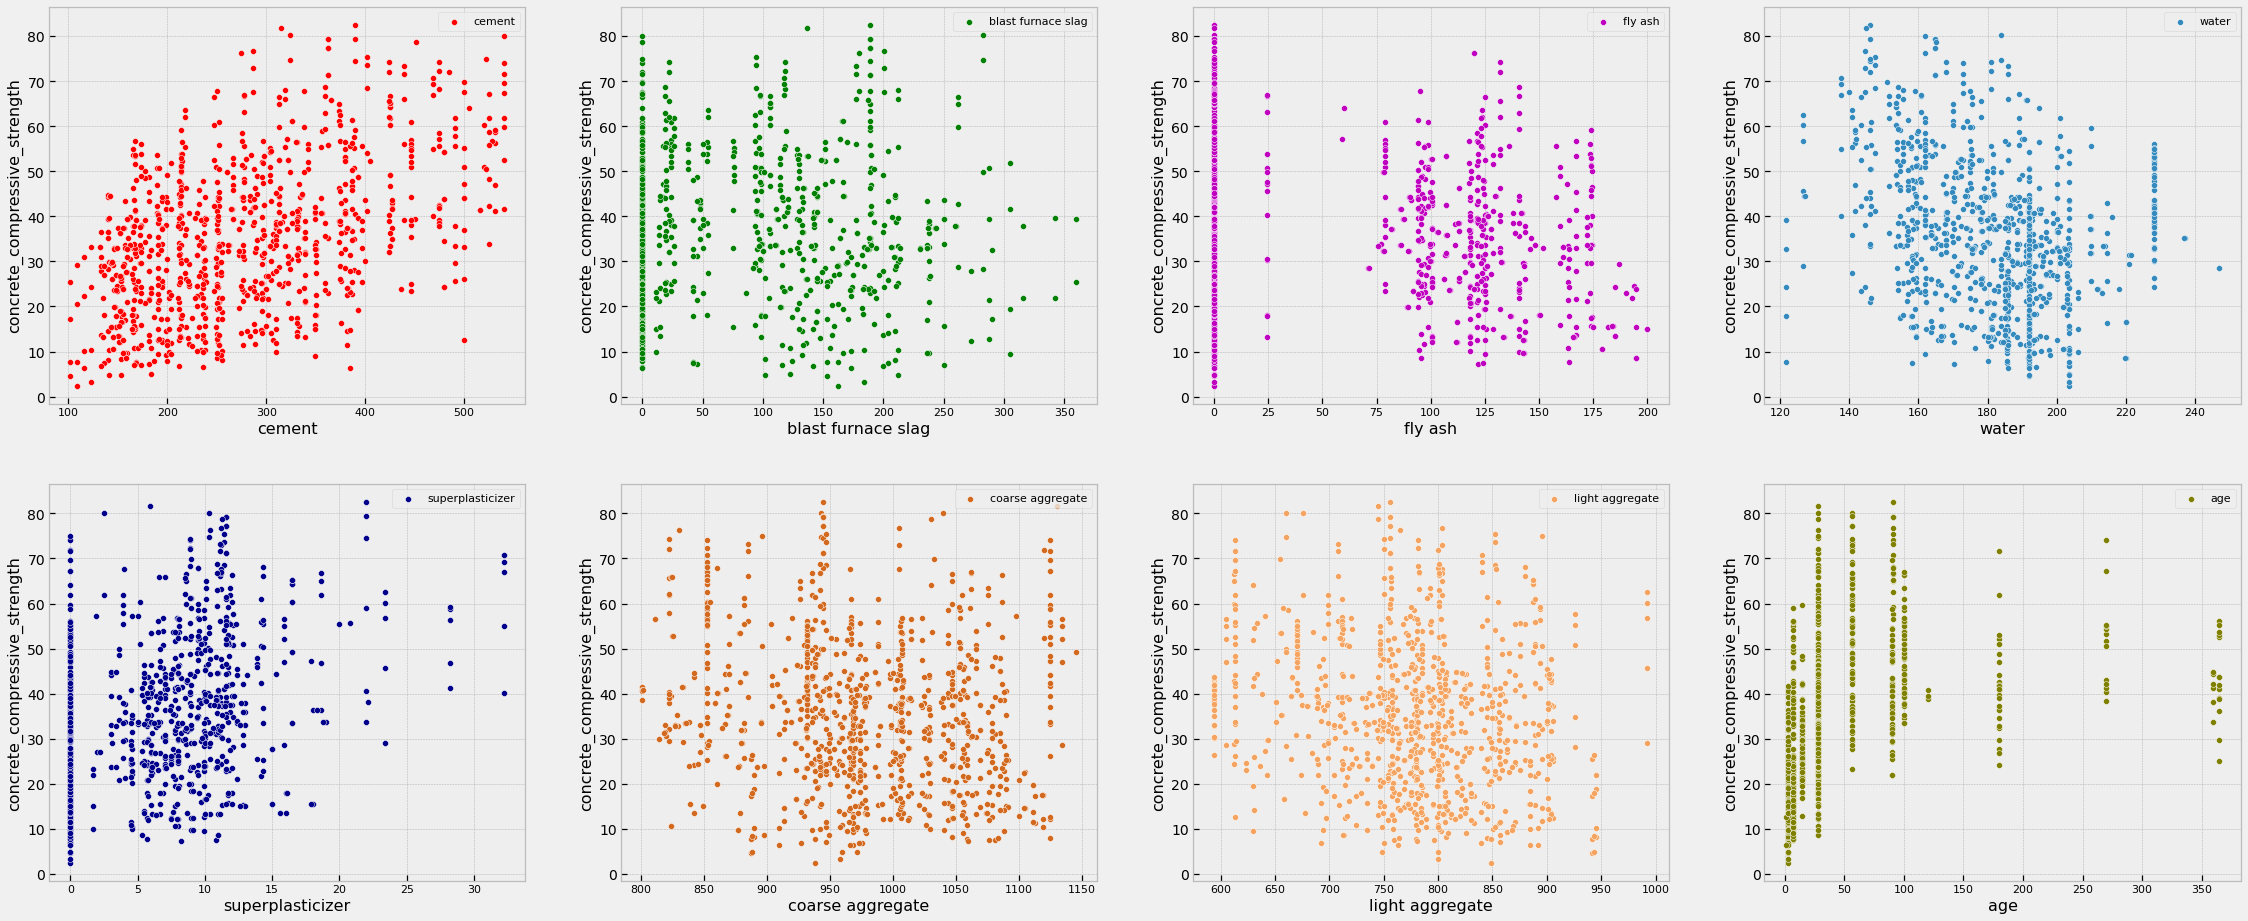

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(35, 15))

# Cement
# sns.scatterplot(data=tips, x="total_bill", y="tip")
chart1 = sns.scatterplot(data= concrete_data, x= "cement", y= "concrete_compressive_strength", label = 'cement', color= 'r', ax = axs[0, 0]) #hue= 'cement'
# axs[0, 0].set_title('Distribution of cement', fontsize = 16)
# axs[0, 0].xaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_xlabel('cement', fontsize= 16)
axs[0, 0].yaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 0].legend(loc='upper right')

# blast_furnace_slag
chart2 = sns.scatterplot(data= concrete_data, x= "blast_furnace_slag", y= "concrete_compressive_strength", label = 'blast furnace slag', color= 'g', ax = axs[0, 1])
# axs[0, 1].set_title('Distribution of blast furnace slag', fontsize = 16)
# axs[0, 1].xaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_xlabel('blast furnace slag', fontsize= 16)
axs[0, 1].yaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 1].legend(loc='upper right')

# fly_ash
chart3 = sns.scatterplot(data= concrete_data, x= "fly_ash", y= "concrete_compressive_strength", label = 'fly ash', color= 'm', ax = axs[0, 2])
# axs[0, 2].set_title('Distribution of fly ash', fontsize = 16)
# axs[0, 2].xaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_xlabel('fly ash', fontsize= 16)
axs[0, 2].yaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 2].legend(loc='upper right')

# water
chart4 = sns.scatterplot(data= concrete_data, x= "water", y= "concrete_compressive_strength", label = 'water', ax = axs[0, 3])
# axs[0, 3].set_title('Distribution of water', fontsize = 16)
# axs[0, 3].xaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_xlabel('water', fontsize= 16)
axs[0, 3].yaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 3].legend(loc='upper right')

# superplasticizer
chart5 = sns.scatterplot(data= concrete_data, x= "superplasticizer", y= "concrete_compressive_strength", label = 'superplasticizer', color= 'darkblue', ax = axs[1, 0])
# axs[1, 0].set_title('Distribution of superplasticizer', fontsize = 16)
# axs[1, 0].xaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_xlabel('superplasticizer', fontsize= 16)
axs[1, 0].yaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 0].legend(loc='upper right')

# coarse_aggregate
chart6 = sns.scatterplot(data= concrete_data, x= "coarse_aggregate", y= "concrete_compressive_strength", label = 'coarse aggregate', color= 'chocolate', ax = axs[1, 1])
# axs[1, 1].set_title('Distribution of coarse_aggregate', fontsize = 16)
# axs[1, 1].xaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_xlabel('coarse aggregate', fontsize= 16)
axs[1, 1].yaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 1].legend(loc='upper right')

# light_aggregate
chart5 = sns.scatterplot(data= concrete_data, x= "light_aggregate", y= "concrete_compressive_strength", label = 'light aggregate', color= 'sandybrown', ax = axs[1, 2])
# axs[1, 2].set_title('Distribution of light aggregate', fontsize = 16)
# axs[1, 2].xaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_xlabel('light aggregate', fontsize= 16)
axs[1, 2].yaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 2].legend(loc='upper right')


# age
chart8 = sns.scatterplot(data= concrete_data, x= "age", y= "concrete_compressive_strength", label = 'age', color= 'olive', ax = axs[1, 3])
# axs[1, 3].set_title('Distribution of age', fontsize = 16)
# axs[1, 3].xaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_xlabel('age', fontsize= 16)
axs[1, 3].yaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 3].legend(loc='upper right')

# legend:
plt.legend()
# show the plot:
plt.show()


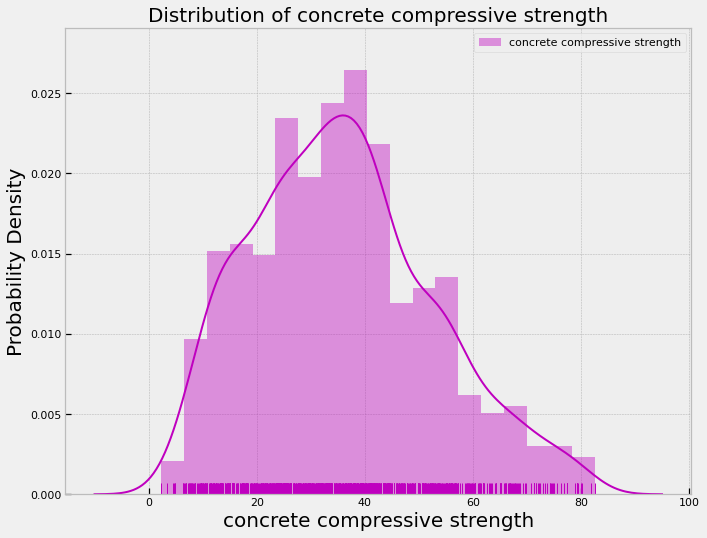

In [30]:
# fig, axs = plt.subplots(1,2, figsize=(35, 15))
plt.figure(figsize = (10,8))

chart1 = sns.distplot(concrete_data['concrete_compressive_strength'] , hist = True, 
                      label = 'concrete compressive strength', 
                      color= 'm',
                      rug= True)

plt.title('Distribution of concrete compressive strength', fontsize = 20)
plt.xlabel('concrete compressive strength', fontsize= 20)
plt.ylabel('Probability Density', fontsize= 20)
plt.legend(loc='upper right')



# show the plot:
plt.show()


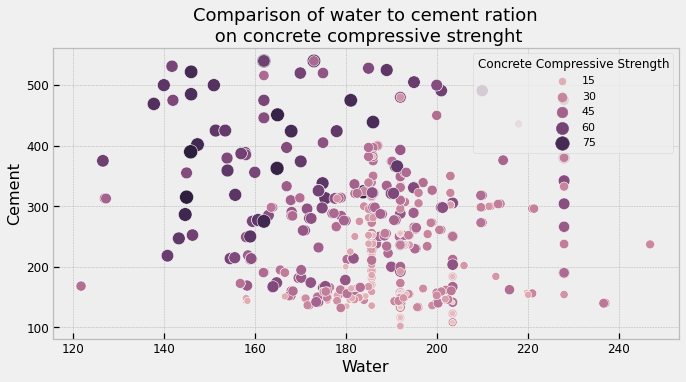

In [31]:

plt.figure(figsize = (10,5))

chart = sns.scatterplot(data= concrete_data, x = 'water', y = "cement", 
                        hue = "concrete_compressive_strength", 
                        size="concrete_compressive_strength",
                        sizes=(20, 200))

plt.title('Comparison of water to cement ration\n on concrete compressive strenght', fontsize = 18)

chart.xaxis.set_tick_params(labelsize = 12)
chart.yaxis.set_tick_params(labelsize = 12)

plt.xlabel('Water', fontsize = 16)
plt.ylabel('Cement', fontsize = 16)

chart.legend(title = 'Concrete Compressive Strength')

plt.show()

In [32]:
# Create new column for w/c ratio:

concrete_data["wc_ratio"] = concrete_data['water'].div(concrete_data["cement"].values)
concrete_data.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  light_aggregate  age  concrete_compressive_strength  \
0            1040.0            676.0   28                          79.99   
1            1055.0            676.0   28                          61.89   
2             932.0            594.0  270                          40.27   
3             932.0            594.0  365                          41.05   
4             978.4            825.5  360                          44.30   

   wc_ratio  
0  0.300000  
1  0.300000  
2  0.685714  
3  0.685714  
4  0.966767

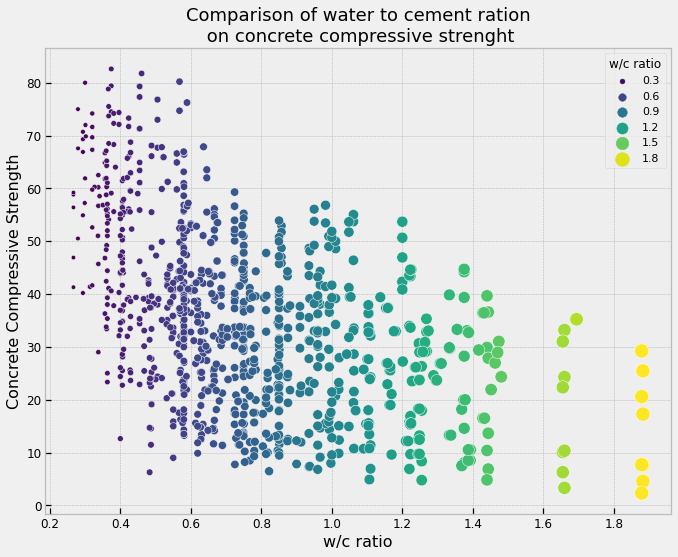

In [35]:
plt.figure(figsize = (10,8))

chart = sns.scatterplot(data= concrete_data, x = 'wc_ratio', y = "concrete_compressive_strength",
                        hue = "wc_ratio", 
                        size="wc_ratio",
                        sizes=(20, 200),
                        palette= 'viridis')

plt.title('Comparison of water to cement ration\n on concrete compressive strenght', fontsize = 18)

chart.xaxis.set_tick_params(labelsize = 12)
chart.yaxis.set_tick_params(labelsize = 12)

plt.xlabel('w/c ratio', fontsize = 16)
plt.ylabel('Concrete Compressive Strength', fontsize = 16)

chart.legend(title = 'w/c ratio')

plt.show()

# Data Cleaning:

In [36]:
# Check duplicates in a data frame
concrete_data.duplicated().sum()

25

In [37]:
duplicates = concrete_data.duplicated()

concrete_data[duplicates]

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
809   252.0                 0.0      0.0  185.0               0.0   

     coarse_aggregate  light_aggregate  age  concrete_compressive_strength  \
77              852.1            887.1    3                          33.40   
80              852.1            887.1    3                          33.40   
86              944.7            755.8    3                          35.30   
88              944.7            755.8    3                          35.30   
91              944.7            755.8    3                          35.30   
100             852.1            887.1    7                          49.20   
103             852.1            887.1    7                          49.20   
109             944.7            755.8    7                          55.90   
111             944.7            755.8    7                          55.90   
123             852.1            887.1   28                          60.29   
126             852.1            887.1   28                          60.29   
132             944.7            755.8   28                          71.30   
134             944.7            755.8   28                          71.30   
137             944.7            755.8   28                          71.30   
146             852.1            887.1   56                          64.30   
149             852.1            887.1   56                          64.30   
155             944.7            755.8   56                          77.30   
157             944.7            755.8   56                          77.30   
160             944.7            755.8   56                          77.30   
169             852.1            887.1   91                          65.20   
172             852.1            887.1   91                          65.20   
177             944.7            755.8   91                          79.30   
179             944.7            755.8   91                          79.30   
182             944.7            755.8   91                          79.30   
809            1111.0            784.0   28                          19.69   

     wc_ratio  
77   0.361176  
80   0.361176  
86   0.454771  
88   0.454771  
91   0.454771  
100  0.361176  
103  0.361176  
109  0.454771  
111  0.454771  
123  0.361176  
126  

In [38]:
# Delete duplicate rows

concrete_data.drop_duplicates(inplace=True)

# Check for outliers:

<AxesSubplot:>

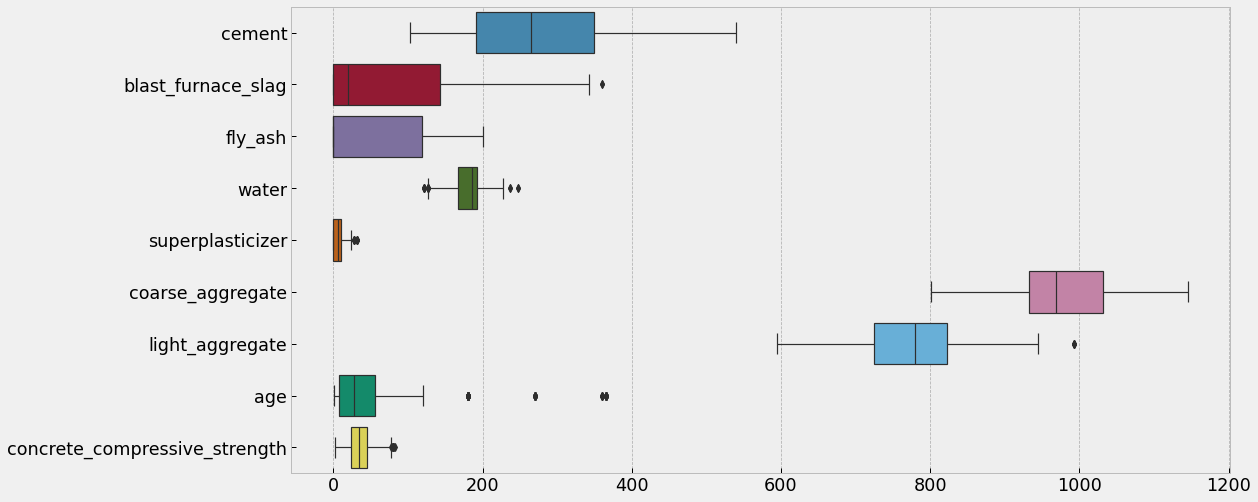

In [39]:
# concrete_data.boxplot(column = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate',
#        'light_aggregate', 'age', 'concrete_compressive_strength'], rot=0, figsize = (22,10));

# Create a boxplot for all the continuous features to check outlier correction:

plt.figure(figsize=(15,8))
sns.set_context("paper", font_scale=2)
sns.boxplot(data= concrete_data[["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                 "coarse_aggregate", "light_aggregate", "age", "concrete_compressive_strength"]],orient="h")

In [40]:
# Treating outliers:

concrete_data_outliers = pd.DataFrame(concrete_data.loc[:,])

# Calculate IQR
Q1 = concrete_data_outliers.quantile(0.25)
Q3 = concrete_data_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement                           158.300000
blast_furnace_slag               142.500000
fly_ash                          118.300000
water                             26.300000
superplasticizer                  10.000000
coarse_aggregate                  99.000000
light_aggregate                   97.900000
age                               49.000000
concrete_compressive_strength     21.350000
wc_ratio                           0.389776
dtype: float64


In [41]:
# We can use IQR score to filter out the outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for 'water', 'superplastic', 
# 'fineagg', 'age' and 'strength' columns
for i, j in zip(np.where(concrete_data_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_data_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_data_outliers.iloc[i,j] = whisker[j]
    
# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_data_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_data_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_data_outliers.iloc[i,j] = whisker[j]

In [42]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'

concrete_data.drop(columns = concrete_data.loc[:,], inplace = True)

# Add 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength' with no outliers from concrete_df_outliers to 
# concrete_df
concrete_data = pd.concat([concrete_data, concrete_data_outliers], axis = 1)

<AxesSubplot:>

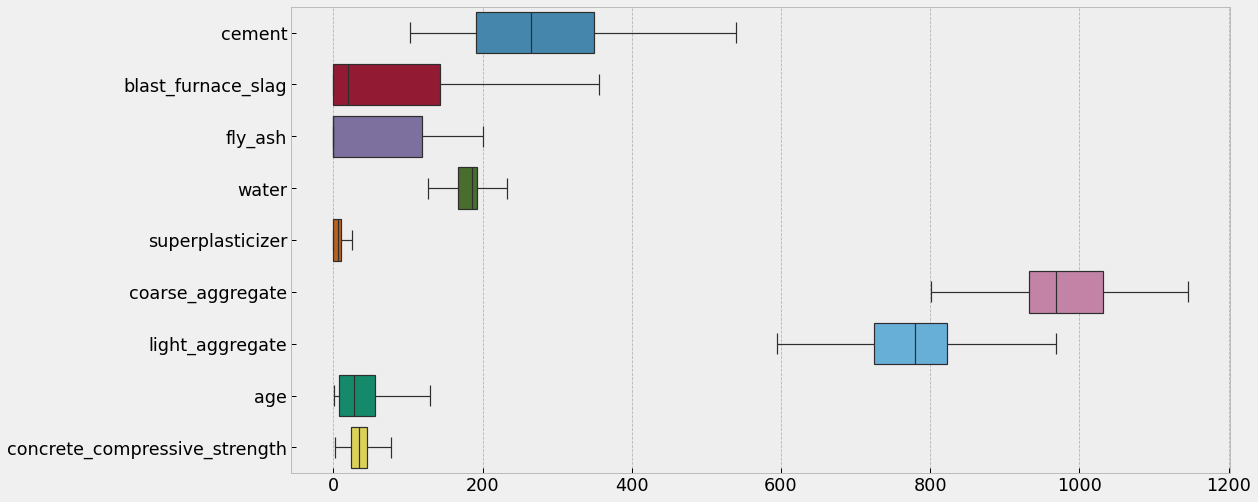

In [43]:
# Create a boxplot for all the continuous features to check outlier correction:

plt.figure(figsize=(15,8))
sns.set_context("paper", font_scale=2)
sns.boxplot(data= concrete_data[["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                 "coarse_aggregate", "light_aggregate", "age", "concrete_compressive_strength"]],orient="h")

In [44]:
# Summary statistics
concrete_data.describe().T

count        mean         std         min  \
cement                         1005.0  278.631343  104.344261  102.000000   
blast_furnace_slag             1005.0   72.037214   86.149994    0.000000   
fly_ash                        1005.0   55.536318   64.207969    0.000000   
water                          1005.0  182.066816   21.158645  127.150000   
superplasticizer               1005.0    5.981493    5.724463    0.000000   
coarse_aggregate               1005.0  974.376816   77.579667  801.000000   
light_aggregate                1005.0  772.571095   80.035934  594.000000   
age                            1005.0   38.076119   35.862549    1.000000   
concrete_compressive_strength  1005.0   35.226318   16.220253    2.330000   
wc_ratio                       1005.0    0.751943    0.300818    0.266893   

                                      25%         50%          75%  \
cement                         190.700000  265.000000   349.000000   
blast_furnace_slag               0.000000   20.000000   142.500000   
fly_ash                          0.000000    0.000000   118.300000   
water                          166.600000  185.700000   192.900000   
superplasticizer                 0.000000    6.100000    10.000000   
coarse_aggregate               932.000000  968.000000  1031.000000   
light_aggregate                724.300000  780.000000   822.200000   
age                              7.000000   28.000000    56.000000   
concrete_compressive_strength   23.520000   33.800000    44.870000   
wc_ratio                         0.547465    0.689531     0.937241   

                                       max  
cement                          540.000000  
blast_furnace_slag              356.250000  
fly_ash                         200.100000  
water                           232.350000  
superplasticizer                 25.000000  
coarse_aggregate               1145.000000  
light_aggregate                 969.050000  
age                             129.500000  
concrete_compressive_strength    76.895000  
wc_ratio                          1.521905

# EDA: Explanatory Data Analysis:

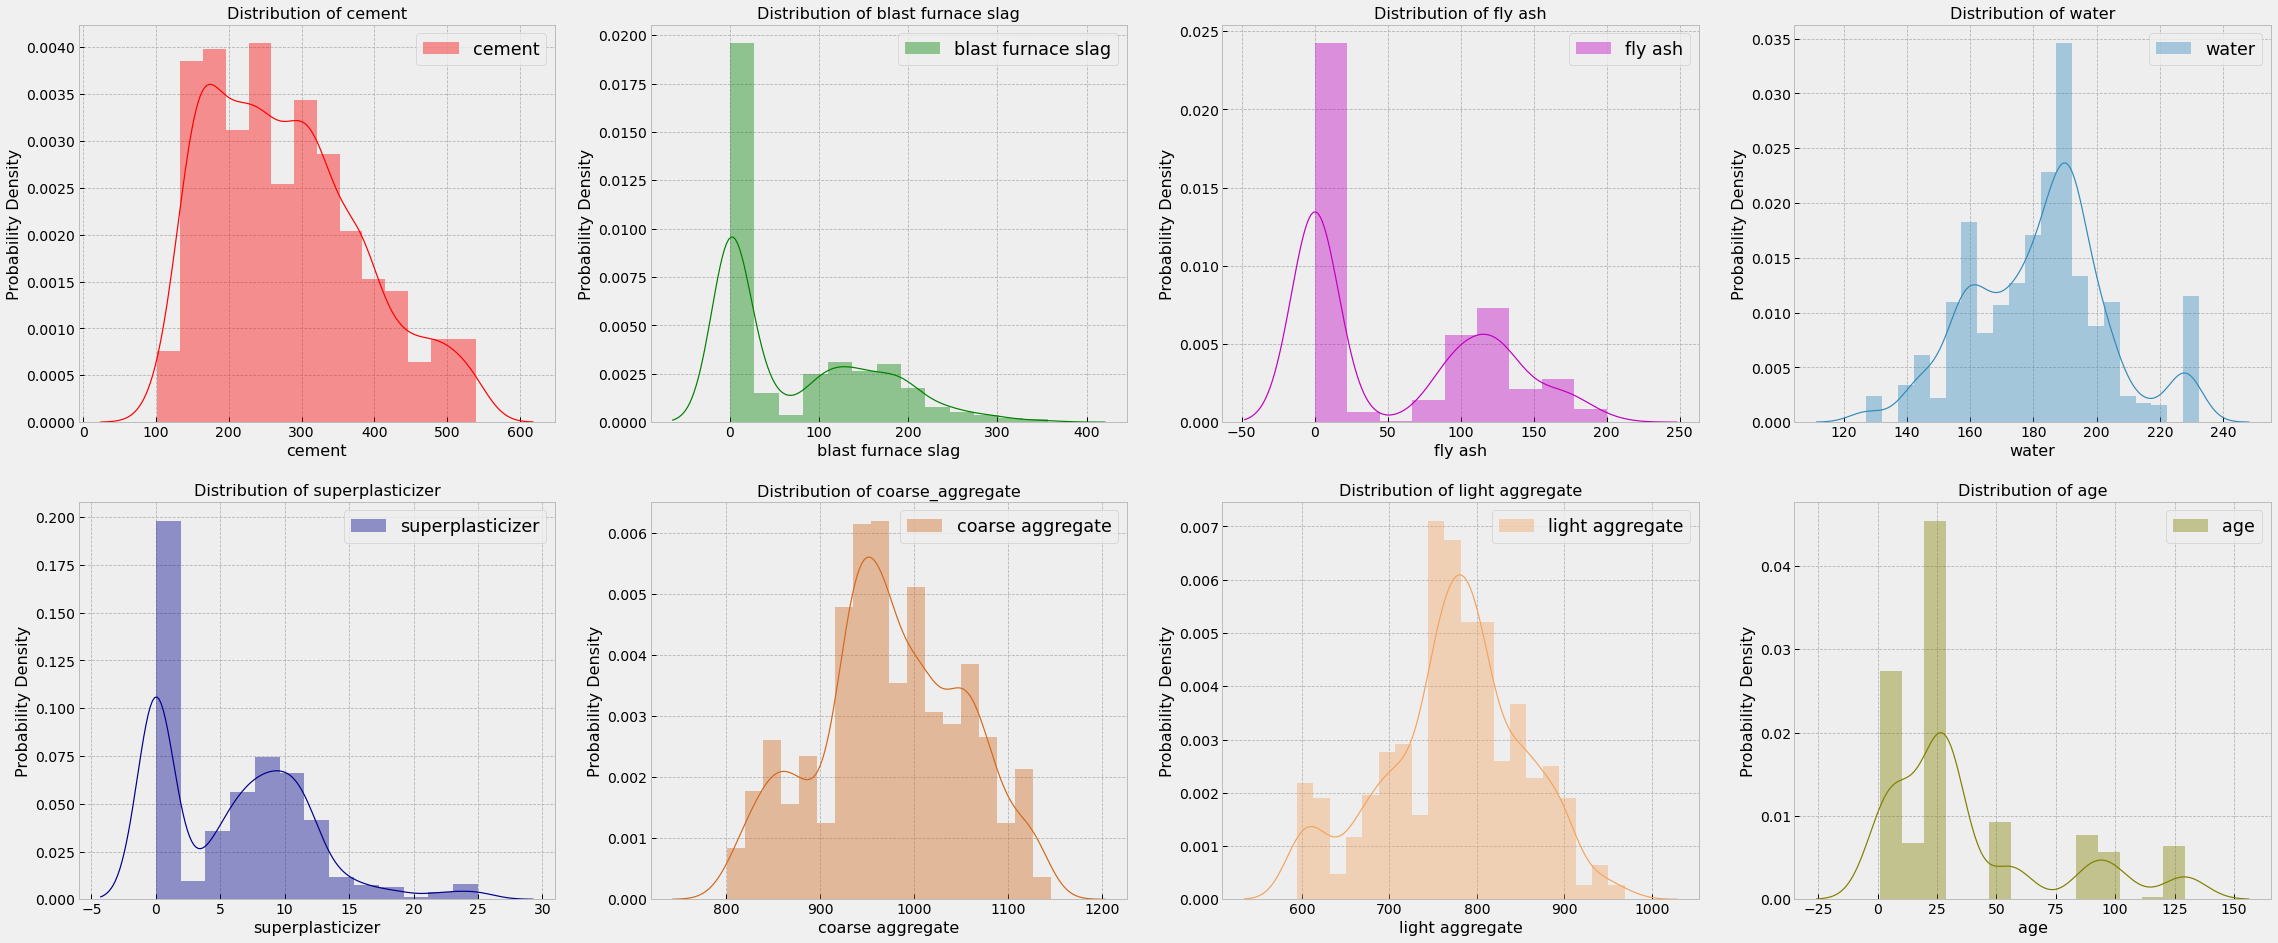

In [45]:
fig, axs = plt.subplots(2, 4, figsize=(35, 15))

# Cement
chart1 = sns.distplot(concrete_data['cement'] , hist = True, label = 'cement', color= 'r', ax = axs[0, 0])
axs[0, 0].set_title('Distribution of cement', fontsize = 16)
axs[0, 0].xaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_xlabel('cement', fontsize= 16)
axs[0, 0].yaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_ylabel('Probability Density', fontsize= 16)
axs[0, 0].legend(loc='upper right')

# blast_furnace_slag
chart2 = sns.distplot(concrete_data['blast_furnace_slag'] , hist = True, label = 'blast furnace slag', color= 'g', ax = axs[0, 1])
axs[0, 1].set_title('Distribution of blast furnace slag', fontsize = 16)
axs[0, 1].xaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_xlabel('blast furnace slag', fontsize= 16)
axs[0, 1].yaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_ylabel('Probability Density', fontsize= 16)
axs[0, 1].legend(loc='upper right')

# fly_ash
chart3 = sns.distplot(concrete_data['fly_ash'] , hist = True, label = 'fly ash', color= 'm', ax = axs[0, 2])
axs[0, 2].set_title('Distribution of fly ash', fontsize = 16)
axs[0, 2].xaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_xlabel('fly ash', fontsize= 16)
axs[0, 2].yaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_ylabel('Probability Density', fontsize= 16)
axs[0, 2].legend(loc='upper right')

# water
chart4 = sns.distplot(concrete_data['water'] , hist = True, label = 'water', ax = axs[0, 3])
axs[0, 3].set_title('Distribution of water', fontsize = 16)
axs[0, 3].xaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_xlabel('water', fontsize= 16)
axs[0, 3].yaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_ylabel('Probability Density', fontsize= 16)
axs[0, 3].legend(loc='upper right')

# superplasticizer
chart5 = sns.distplot(concrete_data['superplasticizer'] , hist = True, label = 'superplasticizer', color= 'darkblue', ax = axs[1, 0])
axs[1, 0].set_title('Distribution of superplasticizer', fontsize = 16)
axs[1, 0].xaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_xlabel('superplasticizer', fontsize= 16)
axs[1, 0].yaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_ylabel('Probability Density', fontsize= 16)
axs[1, 0].legend(loc='upper right')

# coarse_aggregate
chart6 = sns.distplot(concrete_data['coarse_aggregate'] , hist = True, label = 'coarse aggregate', color= 'chocolate', ax = axs[1, 1])
axs[1, 1].set_title('Distribution of coarse_aggregate', fontsize = 16)
axs[1, 1].xaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_xlabel('coarse aggregate', fontsize= 16)
axs[1, 1].yaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_ylabel('Probability Density', fontsize= 16)
axs[1, 1].legend(loc='upper right')

# light_aggregate
chart5 = sns.distplot(concrete_data['light_aggregate'] , hist = True, label = 'light aggregate', color= 'sandybrown', ax = axs[1, 2])
axs[1, 2].set_title('Distribution of light aggregate', fontsize = 16)
axs[1, 2].xaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_xlabel('light aggregate', fontsize= 16)
axs[1, 2].yaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_ylabel('Probability Density', fontsize= 16)
axs[1, 2].legend(loc='upper right')


# age
chart8 = sns.distplot(concrete_data['age'] , hist = True, label = 'age', color= 'olive', ax = axs[1, 3])
axs[1, 3].set_title('Distribution of age', fontsize = 16)
axs[1, 3].xaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_xlabel('age', fontsize= 16)
axs[1, 3].yaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_ylabel('Probability Density', fontsize= 16)
axs[1, 3].legend(loc='upper right')

# legend:
plt.legend()
# show the plot:
plt.show()

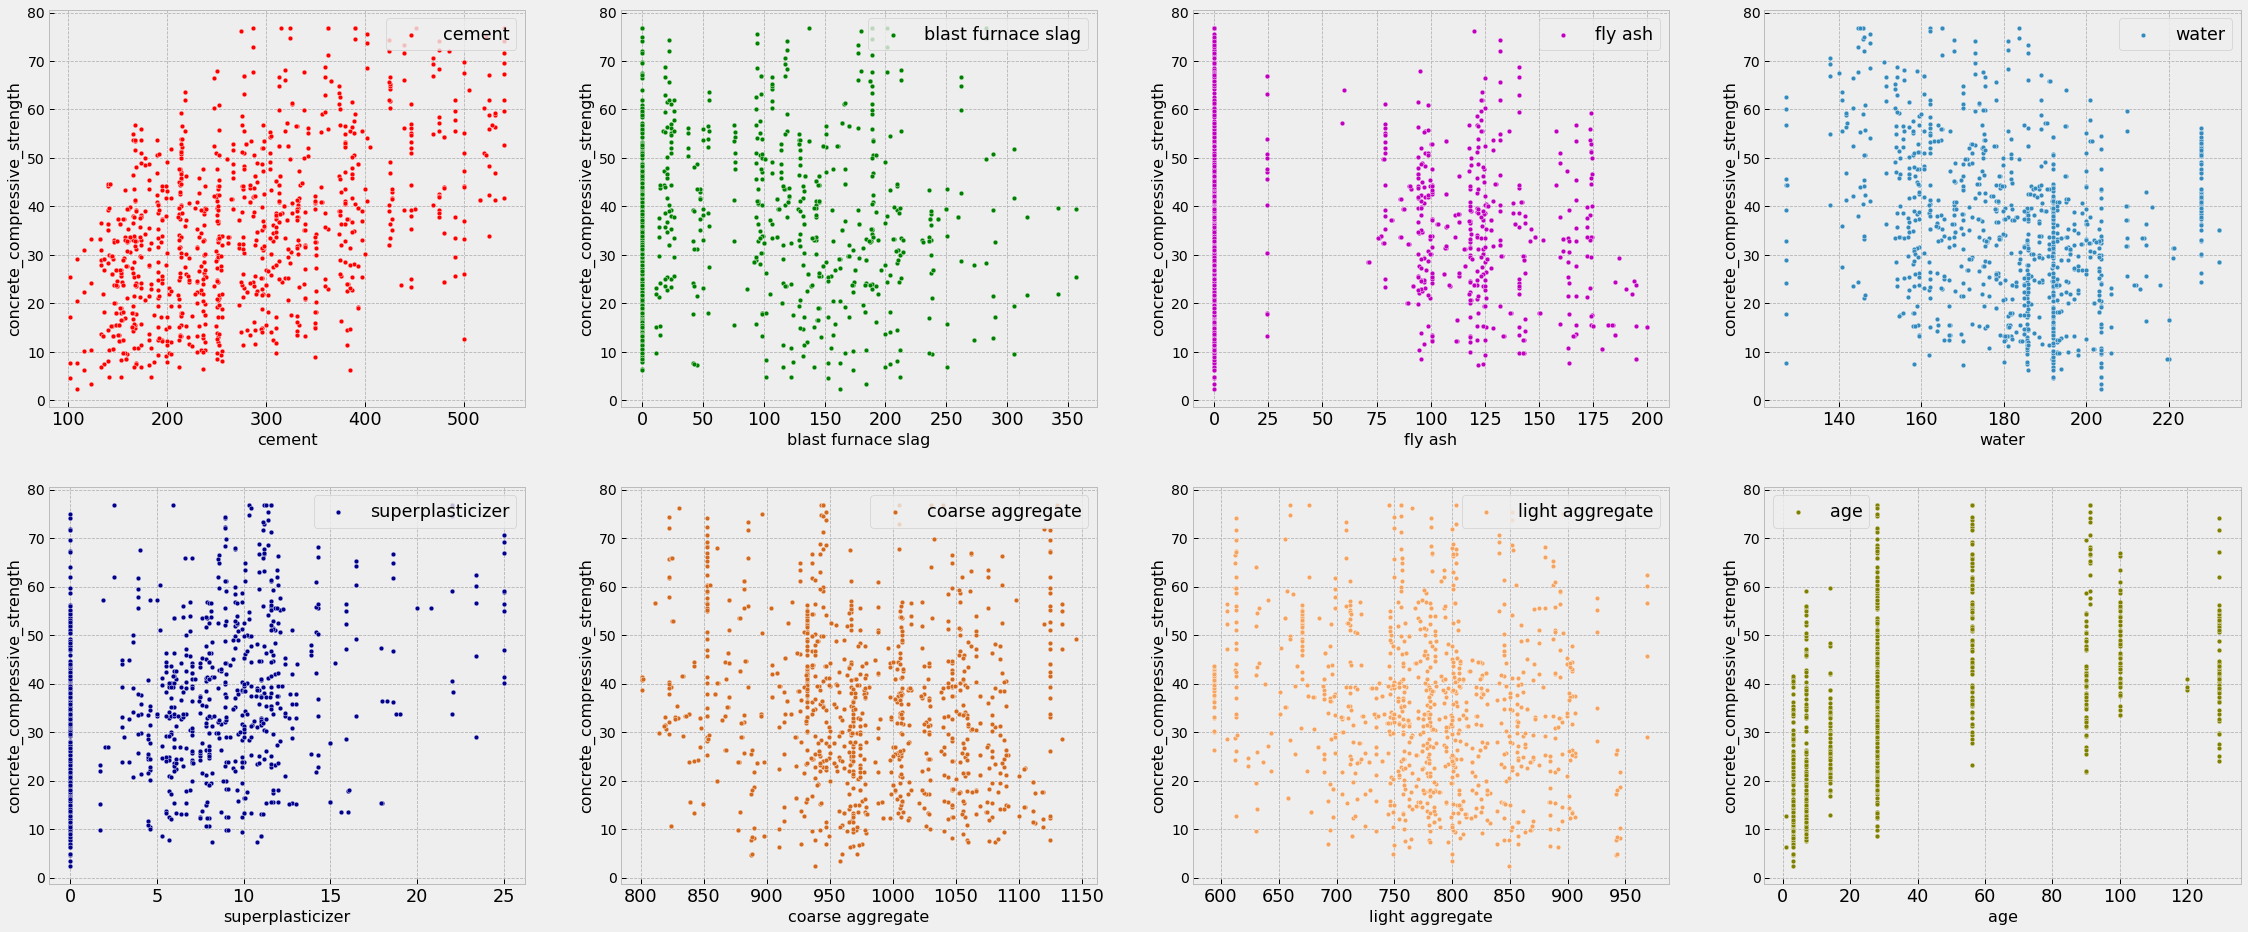

In [46]:
fig, axs = plt.subplots(2, 4, figsize=(35, 15))

# Cement
# sns.scatterplot(data=tips, x="total_bill", y="tip")
chart1 = sns.scatterplot(data= concrete_data, x= "cement", y= "concrete_compressive_strength", label = 'cement', color= 'r', ax = axs[0, 0]) #hue= 'cement'
# axs[0, 0].set_title('Distribution of cement', fontsize = 16)
# axs[0, 0].xaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_xlabel('cement', fontsize= 16)
axs[0, 0].yaxis.set_tick_params(labelsize = 14)
axs[0, 0].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 0].legend(loc='upper right')

# blast_furnace_slag
chart2 = sns.scatterplot(data= concrete_data, x= "blast_furnace_slag", y= "concrete_compressive_strength", label = 'blast furnace slag', color= 'g', ax = axs[0, 1])
# axs[0, 1].set_title('Distribution of blast furnace slag', fontsize = 16)
# axs[0, 1].xaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_xlabel('blast furnace slag', fontsize= 16)
axs[0, 1].yaxis.set_tick_params(labelsize = 14)
axs[0, 1].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 1].legend(loc='upper right')

# fly_ash
chart3 = sns.scatterplot(data= concrete_data, x= "fly_ash", y= "concrete_compressive_strength", label = 'fly ash', color= 'm', ax = axs[0, 2])
# axs[0, 2].set_title('Distribution of fly ash', fontsize = 16)
# axs[0, 2].xaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_xlabel('fly ash', fontsize= 16)
axs[0, 2].yaxis.set_tick_params(labelsize = 14)
axs[0, 2].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 2].legend(loc='upper right')

# water
chart4 = sns.scatterplot(data= concrete_data, x= "water", y= "concrete_compressive_strength", label = 'water', ax = axs[0, 3])
# axs[0, 3].set_title('Distribution of water', fontsize = 16)
# axs[0, 3].xaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_xlabel('water', fontsize= 16)
axs[0, 3].yaxis.set_tick_params(labelsize = 14)
axs[0, 3].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[0, 3].legend(loc='upper right')

# superplasticizer
chart5 = sns.scatterplot(data= concrete_data, x= "superplasticizer", y= "concrete_compressive_strength", label = 'superplasticizer', color= 'darkblue', ax = axs[1, 0])
# axs[1, 0].set_title('Distribution of superplasticizer', fontsize = 16)
# axs[1, 0].xaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_xlabel('superplasticizer', fontsize= 16)
axs[1, 0].yaxis.set_tick_params(labelsize = 14)
axs[1, 0].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 0].legend(loc='upper right')

# coarse_aggregate
chart6 = sns.scatterplot(data= concrete_data, x= "coarse_aggregate", y= "concrete_compressive_strength", label = 'coarse aggregate', color= 'chocolate', ax = axs[1, 1])
# axs[1, 1].set_title('Distribution of coarse_aggregate', fontsize = 16)
# axs[1, 1].xaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_xlabel('coarse aggregate', fontsize= 16)
axs[1, 1].yaxis.set_tick_params(labelsize = 14)
axs[1, 1].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 1].legend(loc='upper right')

# light_aggregate
chart5 = sns.scatterplot(data= concrete_data, x= "light_aggregate", y= "concrete_compressive_strength", label = 'light aggregate', color= 'sandybrown', ax = axs[1, 2])
# axs[1, 2].set_title('Distribution of light aggregate', fontsize = 16)
# axs[1, 2].xaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_xlabel('light aggregate', fontsize= 16)
axs[1, 2].yaxis.set_tick_params(labelsize = 14)
axs[1, 2].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 2].legend(loc='upper right')


# age
chart8 = sns.scatterplot(data= concrete_data, x= "age", y= "concrete_compressive_strength", label = 'age', color= 'olive', ax = axs[1, 3])
# axs[1, 3].set_title('Distribution of age', fontsize = 16)
# axs[1, 3].xaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_xlabel('age', fontsize= 16)
axs[1, 3].yaxis.set_tick_params(labelsize = 14)
axs[1, 3].set_ylabel('concrete_compressive_strength', fontsize= 16)
axs[1, 3].legend(loc='upper right')

# legend:
plt.legend()
# show the plot:
plt.show()


In [47]:
# Summary statistics
concrete_data.describe().T

count        mean         std         min  \
cement                         1005.0  278.631343  104.344261  102.000000   
blast_furnace_slag             1005.0   72.037214   86.149994    0.000000   
fly_ash                        1005.0   55.536318   64.207969    0.000000   
water                          1005.0  182.066816   21.158645  127.150000   
superplasticizer               1005.0    5.981493    5.724463    0.000000   
coarse_aggregate               1005.0  974.376816   77.579667  801.000000   
light_aggregate                1005.0  772.571095   80.035934  594.000000   
age                            1005.0   38.076119   35.862549    1.000000   
concrete_compressive_strength  1005.0   35.226318   16.220253    2.330000   
wc_ratio                       1005.0    0.751943    0.300818    0.266893   

                                      25%         50%          75%  \
cement                         190.700000  265.000000   349.000000   
blast_furnace_slag               0.000000   20.000000   142.500000   
fly_ash                          0.000000    0.000000   118.300000   
water                          166.600000  185.700000   192.900000   
superplasticizer                 0.000000    6.100000    10.000000   
coarse_aggregate               932.000000  968.000000  1031.000000   
light_aggregate                724.300000  780.000000   822.200000   
age                              7.000000   28.000000    56.000000   
concrete_compressive_strength   23.520000   33.800000    44.870000   
wc_ratio                         0.547465    0.689531     0.937241   

                                       max  
cement                          540.000000  
blast_furnace_slag              356.250000  
fly_ash                         200.100000  
water                           232.350000  
superplasticizer                 25.000000  
coarse_aggregate               1145.000000  
light_aggregate                 969.050000  
age                             129.500000  
concrete_compressive_strength    76.895000  
wc_ratio                          1.521905

# Multivariate Analysis:

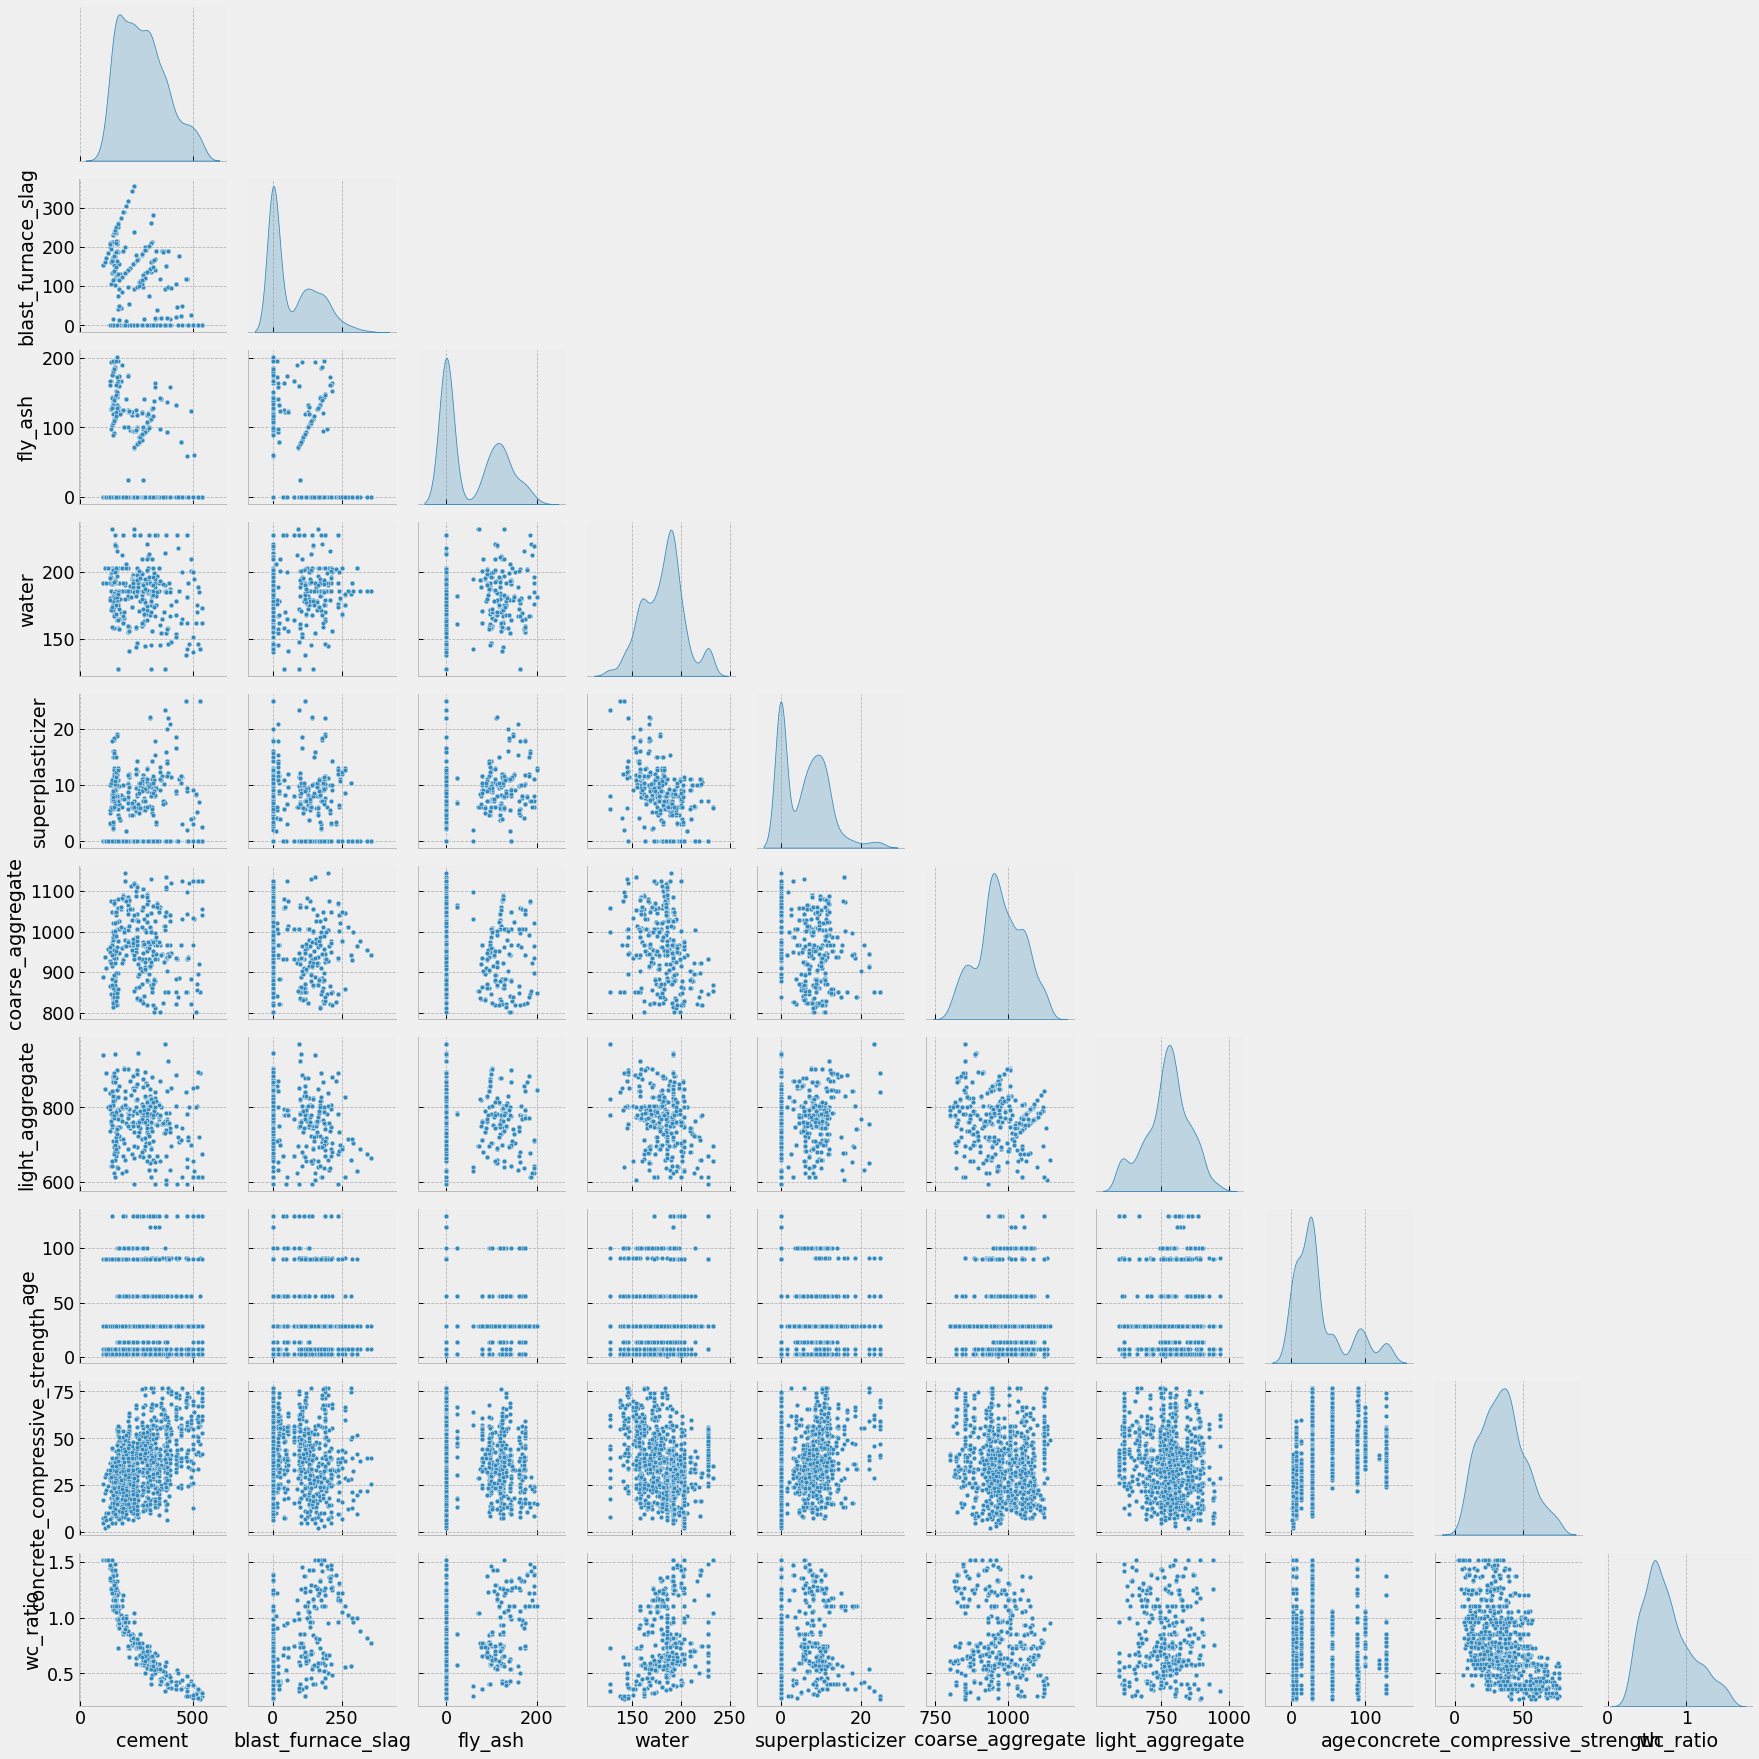

In [48]:
sns.pairplot(concrete_data, diag_kind = 'kde', corner = True)

# Correlation:

In [49]:
concrete_data.corr()

cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.303370 -0.385610   
blast_furnace_slag            -0.303370            1.000000 -0.312365   
fly_ash                       -0.385610           -0.312365  1.000000   
water                         -0.057209            0.130227 -0.284541   
superplasticizer               0.044817            0.019602  0.436185   
coarse_aggregate              -0.086205           -0.277595 -0.026468   
light_aggregate               -0.247662           -0.291129  0.091873   
age                            0.055649           -0.054634 -0.094626   
concrete_compressive_strength  0.488690            0.102440 -0.079685   
wc_ratio                      -0.890269            0.391269  0.249471   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.057209          0.044817         -0.086205   
blast_furnace_slag             0.130227          0.019602         -0.277595   
fly_ash                       -0.284541          0.436185         -0.026468   
water                          1.000000         -0.656012         -0.210399   
superplasticizer              -0.656012          1.000000         -0.235715   
coarse_aggregate              -0.210399         -0.235715          1.000000   
light_aggregate               -0.444192          0.201940         -0.160494   
age                            0.194559         -0.127533          0.012784   
concrete_compressive_strength -0.271381          0.342983         -0.145794   
wc_ratio                       0.315806         -0.184734         -0.051072   

                               light_aggregate       age  \
cement                               -0.247662  0.055649   
blast_furnace_slag                   -0.291129 -0.054634   
fly_ash                               0.091873 -0.094626   
water                                -0.444192  0.194559   
superplasticizer                      0.201940 -0.127533   
coarse_aggregate                     -0.160494  0.012784   
light_aggregate                       1.000000 -0.097933   
age                                  -0.097933  1.000000   
concrete_compressive_strength        -0.188509  0.476726   
wc_ratio                              0.072643 -0.027142   

                               concrete_compressive_strength  wc_ratio  
cement                                              0.488690 -0.890269  
blast_furnace_slag                                  0.102440  0.391269  
fly_ash                                            -0.079685  0.249471  
water                                              -0.271381  0.315806  
superplasticizer                                    0.342983 -0.184734  
coarse_aggregate                                   -0.145794 -0.051072  
light_aggregate                                    -0.188509  0.072643  
age                                                 0.476726 -0.027142  
concrete_compressive_strength                       1.000000 -0.494300  
wc_ratio                                           -0.494300  1.000000

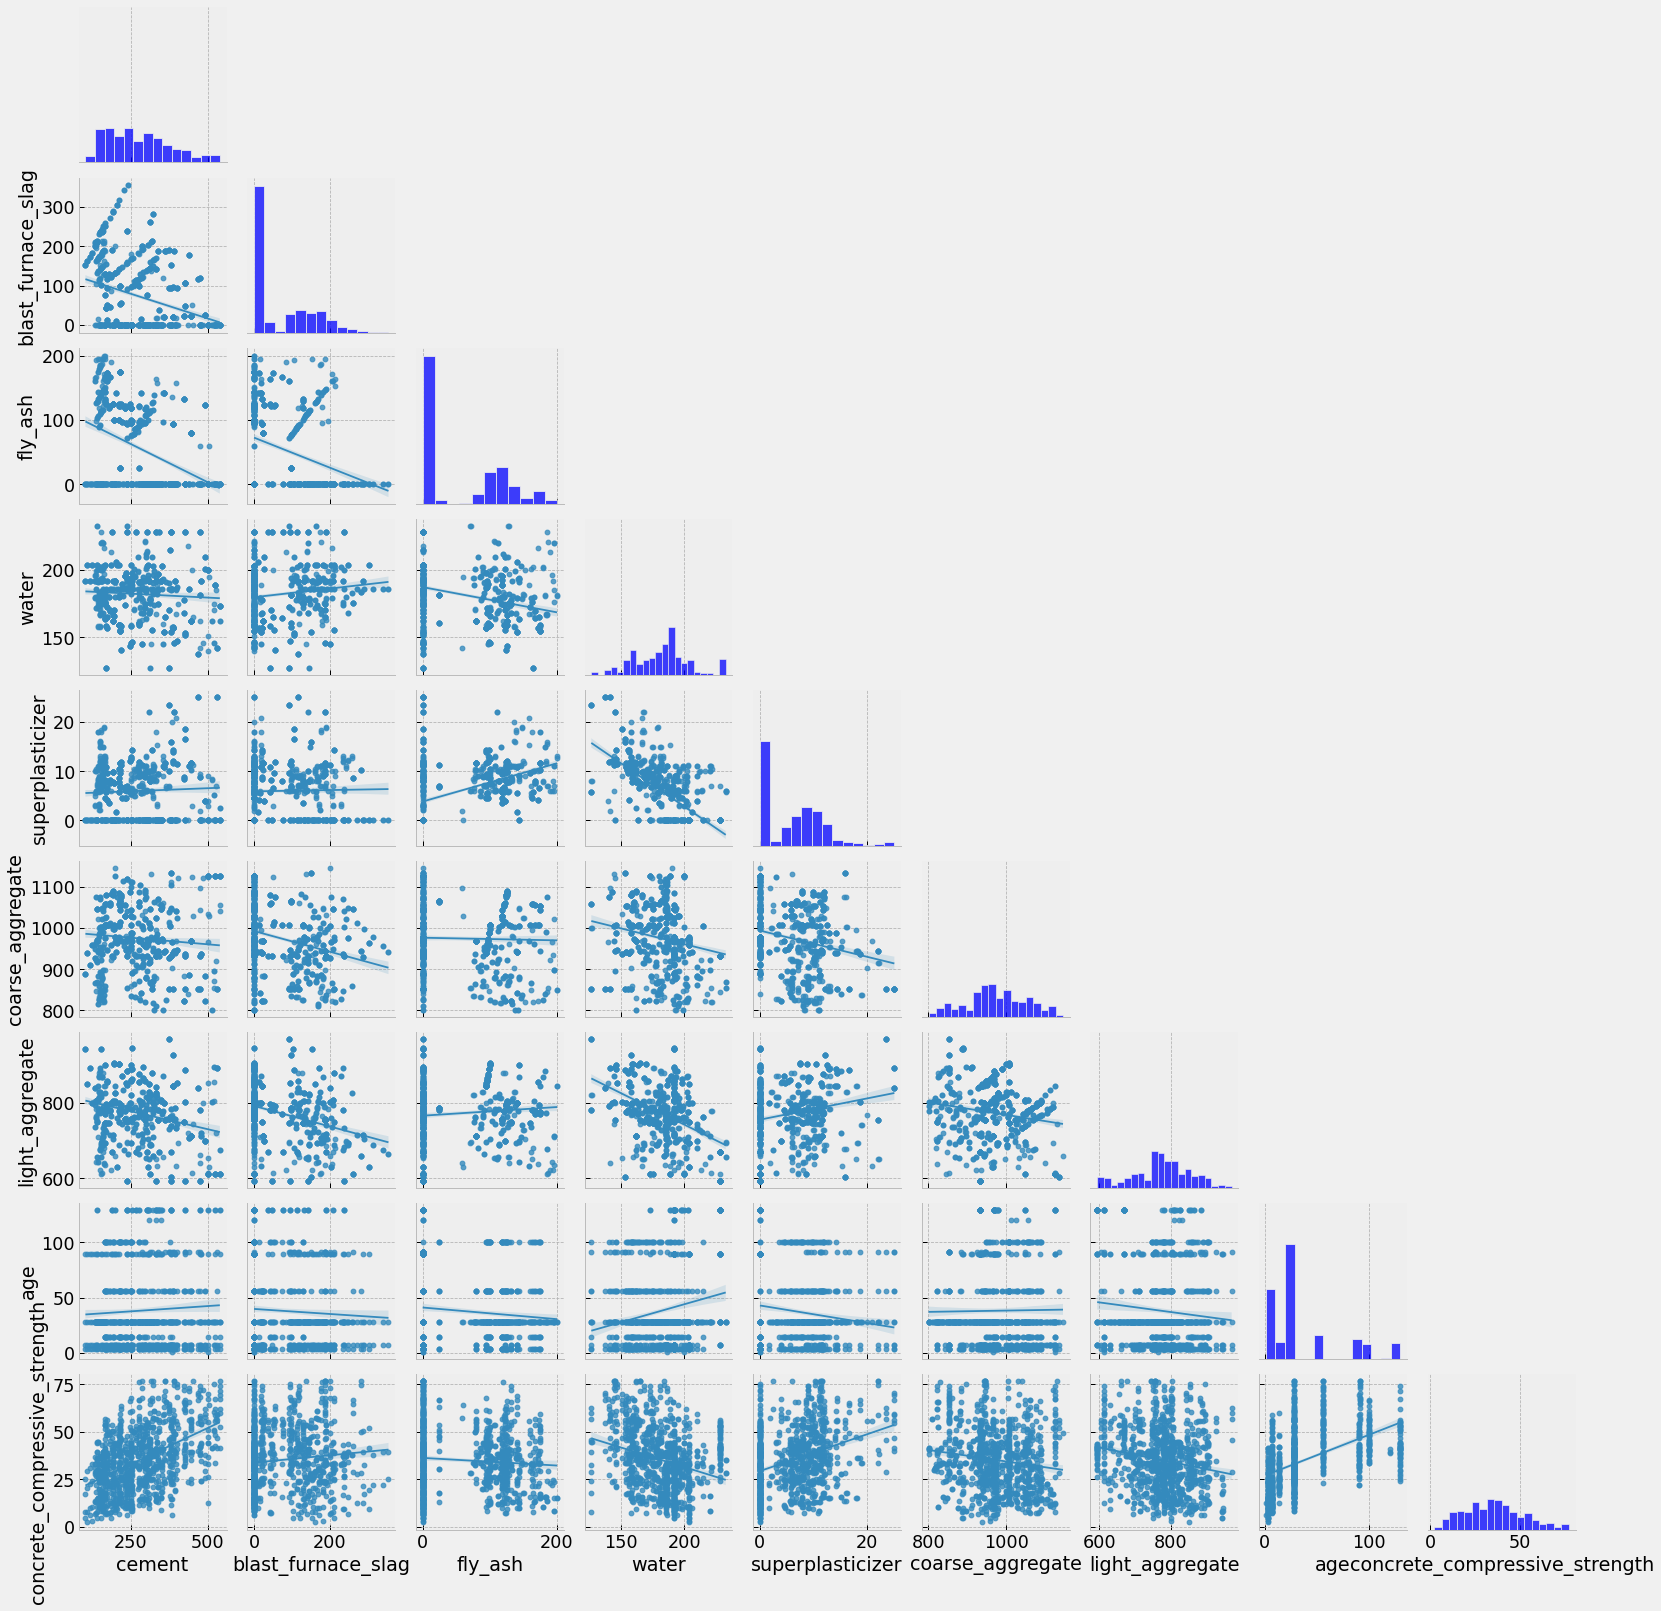

In [50]:
sns.pairplot(concrete_data[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate',
       'light_aggregate', 'age', 'concrete_compressive_strength']], kind = 'reg', corner = True)

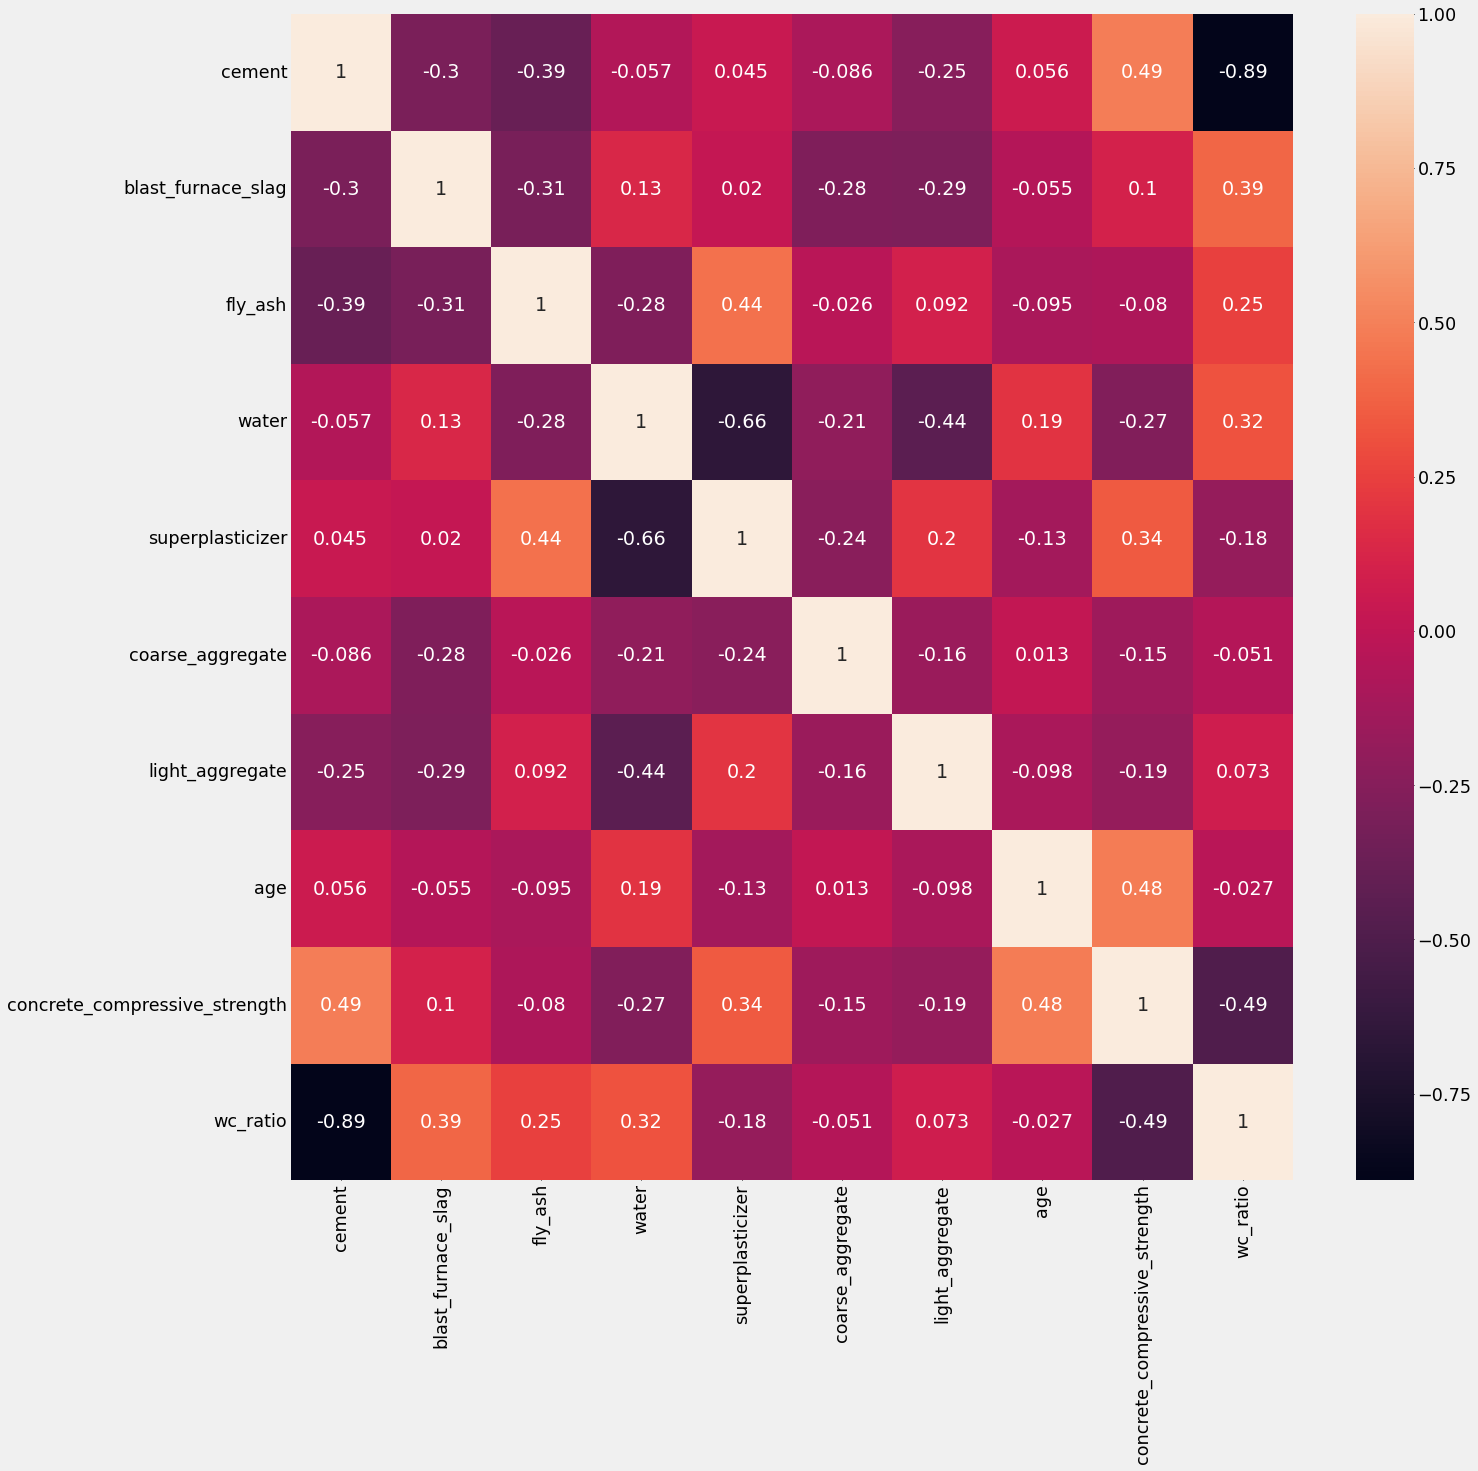

In [51]:
# Heat map for checking correlation:

plt.figure(figsize= (20,20))
sns.heatmap(data= concrete_data.corr(), annot=True);

plt.show()

In [52]:
concrete_data.corr()['concrete_compressive_strength'].sort_values()[:-1]

wc_ratio             -0.494300
water                -0.271381
light_aggregate      -0.188509
coarse_aggregate     -0.145794
fly_ash              -0.079685
blast_furnace_slag    0.102440
superplasticizer      0.342983
age                   0.476726
cement                0.488690
Name: concrete_compressive_strength, dtype: float64

# Create Training & Test Set:

In [54]:
X = concrete_data.drop(['concrete_compressive_strength', 'wc_ratio'], axis = 1) # Considering all Predictors except concrete strength
y = concrete_data['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Print results
print('Train {}%'.format(X_train.shape[0] / concrete_data.shape[0] * 100))
# print('Val {}%'.format(X_val.shape[0] / concrete_data.shape[0] * 100))
print('Test {}%'.format(X_test.shape[0] / concrete_data.shape[0] * 100))

Train 69.9502487562189%
Test 30.049751243781092%


# Train & Test Model:

In [55]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    
    print (model)
    
    if scale == 'yes':
        # prepare the model with input scaling
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        # prepare the model with input scaling
        pipeline = Pipeline([('model', model)])
        
    # Fit the model on Training set
    pipeline.fit(X_train, y_train) 
    # Predict on Test set
    prediction = pipeline.predict(X_test)

    # Calculate the r squared value on the Test set
    r2 = metrics.r2_score(y_test, prediction)
    # Root mean squared error
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))
            
    # Accuracy of Training data set
    train_accuracy_score = pipeline.score(X_train, y_train)
    
    # Accuracy of Test data set
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    if of_type == "coef":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r", linewidth=2)
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"], coef[0],palette="jet_r", linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': train_accuracy_score, 
                              'Test Accuracy': test_accuracy_score}, index=[index])
    
    return resultsDf, pipeline  # return all the metrics along with predictions

In [57]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    # define regressor models
    models=[['LinearRegression',LinearRegression()],
            ['Lasso',Lasso(random_state = 1)],
            ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
            ['DecisionTreeRegressor',DecisionTreeRegressor(random_state = 1)],
            ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
            ['XGBRegressor',XGBRegressor()]]

    resultsDf_common = pd.DataFrame()
    i = 6
    for name, regressor in models:
        # Train and Test the model
        reg_resultsDf, model = train_test_model(regressor, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale)
        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

In [65]:
lr = LinearRegression()
                                                     
# Train and Test the model
LineaRegression_results, model = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
print(lr.coef_, lr.intercept_)
LineaRegression_results


LinearRegression()
[ 0.11264337  0.09733632  0.08066971 -0.19774265  0.17079723  0.01037556
  0.01746429  0.25337885] -5.933185161154235


Method  R Squared     RMSE  Train Accuracy  Test Accuracy
1  LinearRegression   0.699729  8.85089        0.726919       0.699729

In [66]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

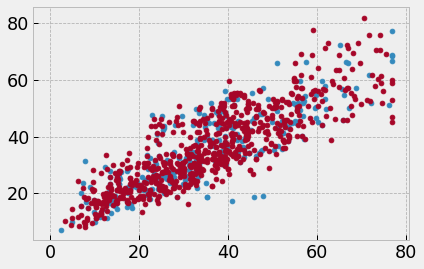

In [67]:
plt.scatter(y_test, y_test_pred)
plt.scatter(y_train, y_train_pred)
plt.plot([0,0],[80,80])
plt.show()

Lasso(random_state=1)
The intercept for our model is 35.6046159317212 

The coefficient for cement is 7.444151301272106
The coefficient for blast_furnace_slag is 3.9221434596510085
The coefficient for fly_ash is 0.0
The coefficient for water is -3.4166058867102316
The coefficient for superplasticizer is 2.1165471426586575
The coefficient for coarse_aggregate is -0.0
The coefficient for light_aggregate is -0.0
The coefficient for age is 9.02098340582677
[ 7.4441513   3.92214346  0.         -3.41660589  2.11654714 -0.
 -0.          9.02098341]


Method  R Squared      RMSE  Train Accuracy  Test Accuracy
3  Lasso   0.759375  7.923193        0.789668       0.759375
3  Lasso   0.759375  7.923193        0.789668       0.759375

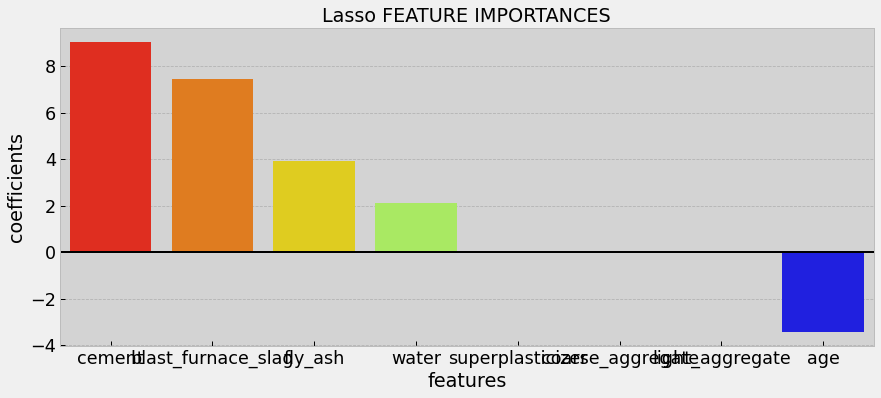

In [68]:
# Building a Lasso Regression model
lasso = Lasso(random_state = 1)

# Train and Test the model
lassoRegression_results, model = train_test_model(lasso, 'Lasso', X_train, X_test, y_train, y_test, 'coef', 3, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([lassoRegression_results, lassoRegression_results])
resultsDf

RandomForestRegressor(random_state=1)


Method  R Squared      RMSE  Train Accuracy  Test Accuracy
1       LinearRegression   0.699729  8.850890        0.726919       0.699729
3                  Lasso   0.759375  7.923193        0.789668       0.759375
5  RandomForestRegressor   0.903754  5.010957        0.984746       0.903754

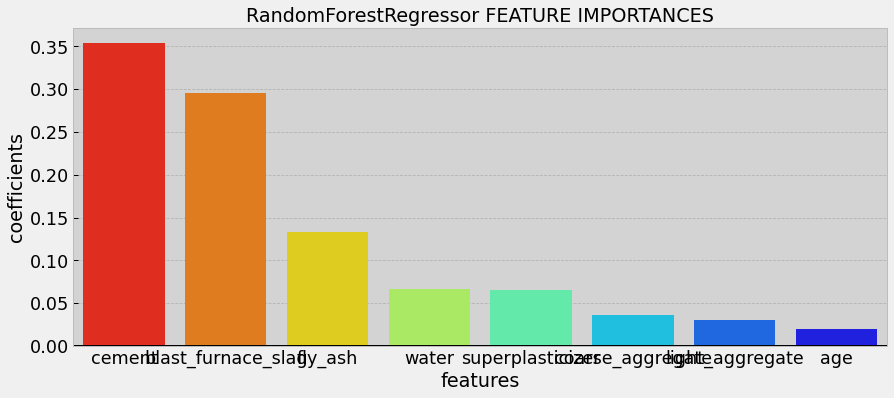

In [69]:
# Building a Random Forest Regression model
randomforest = RandomForestRegressor(random_state = 1)

# Train and Test the model
randomforest_results, model = train_test_model(randomforest, 'RandomForestRegressor', X_train, X_test, y_train, y_test,
                                        'feat', 5, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([LineaRegression_results, lassoRegression_results, randomforest_results])
resultsDf

DecisionTreeRegressor(random_state=1)


Method  R Squared      RMSE  Train Accuracy  Test Accuracy
1       LinearRegression   0.699729  8.850890        0.726919       0.699729
3                  Lasso   0.759375  7.923193        0.789668       0.759375
5  RandomForestRegressor   0.903754  5.010957        0.984746       0.903754
5  DecisionTreeRegressor   0.814220  6.961935        0.999080       0.814220

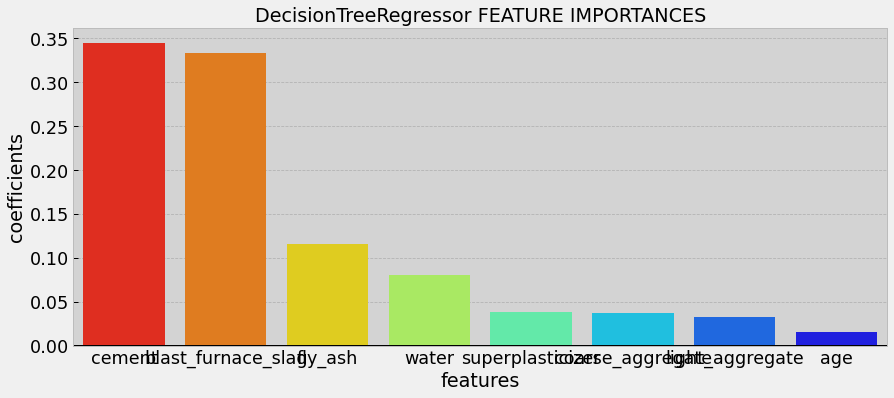

In [70]:
# Building a Decision Tree Regression model
decisiontree = DecisionTreeRegressor(random_state = 1)

# Train and Test the model
decisiontree_results, model = train_test_model(decisiontree, 'DecisionTreeRegressor', X_train, X_test, y_train, y_test,
                                        'feat', 5, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([LineaRegression_results, lassoRegression_results, randomforest_results, decisiontree_results])
resultsDf

GradientBoostingRegressor(random_state=1)


Method  R Squared      RMSE  Train Accuracy  \
1           LinearRegression   0.699729  8.850890        0.726919   
3                      Lasso   0.759375  7.923193        0.789668   
5      RandomForestRegressor   0.903754  5.010957        0.984746   
5      DecisionTreeRegressor   0.814220  6.961935        0.999080   
5  GradientBoostingRegressor   0.894308  5.251105        0.950267   

   Test Accuracy  
1       0.699729  
3       0.759375  
5       0.903754  
5       0.814220  
5       0.894308

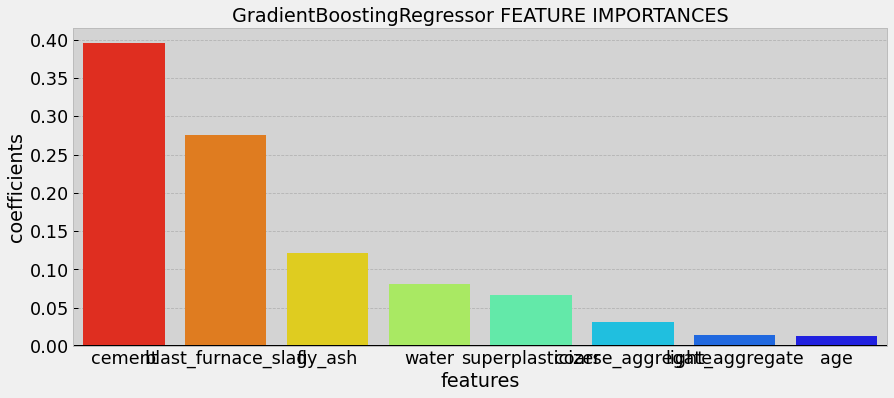

In [72]:
# Building a Gradient Boosting Regression model
gradientboosting = GradientBoostingRegressor(random_state = 1)

# Train and Test the model
gradientboosting_results, model = train_test_model(gradientboosting, 'GradientBoostingRegressor', X_train, X_test, y_train, y_test,
                                        'feat', 5, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([LineaRegression_results, 
                       lassoRegression_results, 
                       randomforest_results, 
                       decisiontree_results, 
                       gradientboosting_results])
resultsDf

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)


Method  R Squared      RMSE  Train Accuracy  \
1           LinearRegression   0.699729  8.850890        0.726919   
3                      Lasso   0.759375  7.923193        0.789668   
5      RandomForestRegressor   0.903754  5.010957        0.984746   
5      DecisionTreeRegressor   0.814220  6.961935        0.999080   
5  GradientBoostingRegressor   0.894308  5.251105        0.950267   
5               XGBRegressor   0.908273  4.891923        0.998553   

   Test Accuracy  
1       0.699729  
3       0.759375  
5       0.903754  
5       0.814220  
5       0.894308  
5       0.908273

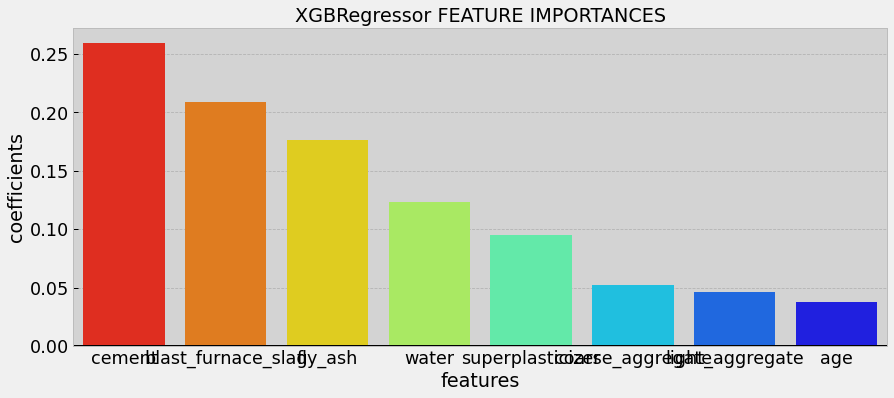

In [73]:
# Building a XGB Regression model
xgbregres = XGBRegressor(random_state = 1)

# Train and Test the model
xgbregres_results, modelxgb = train_test_model(xgbregres, 'XGBRegressor', X_train, X_test, y_train, y_test,
                                        'feat', 5, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([LineaRegression_results, 
                       lassoRegression_results, 
                       randomforest_results, 
                       decisiontree_results, 
                       gradientboosting_results,
                       xgbregres_results])
resultsDf

# Feature Importance:

## Linear Regression:

In [74]:
# Selecting features using Linear Regression regularisation using SelectFromModel
sel_ = SelectFromModel(LinearRegression())
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [75]:
# Visualising features that were kept by the linear Regression regularisation
sel_.get_support()

array([False, False, False,  True,  True, False, False,  True])

In [76]:
# Make a list of with the selected features
linearregres_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_linearregres = X_train[linearregres_selected_feat]
X_test_linearregres = X_test[linearregres_selected_feat]

# Linear Regression with it's important features
pd.DataFrame(X_train_linearregres.columns)

0
0             water
1  superplasticizer
2               age

### Train and Test all models with "Linear Regression" interaction terms (it's important features)

In [77]:
train_test_allmodels(X_train_linearregres, X_test_linearregres, y_train, y_test, 'no')

LinearRegression()
Lasso(random_state=1)
RandomForestRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Method  R Squared       RMSE  Train Accuracy  \
6            LinearRegression   0.334576  13.175872        0.442595   
7                       Lasso   0.332845  13.192997        0.442443   
8       RandomForestRegressor   0.647140   9.594696        0.918505   
9       DecisionTreeRegressor   0.560381  10.709470        0.955947   
10  GradientBoostingRegressor   0.639071   9.703774        0.793387   
11               XGBRegressor   0.674044   9.221665        0.953606   

    Test Accuracy  
6        0.334576  
7        0.332845  
8        0.647140  
9        0.560381  
10       0.639071  
11       0.674044

## Random Forest:

In [78]:
# Selecting features using Random Forest regularisation using SelectFromModel
sel_ = SelectFromModel(RandomForestRegressor(random_state = 0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=0))

In [79]:
# Visualising features that were kept by the Random Forest regularisation
sel_.get_support()

array([ True, False, False,  True, False, False, False,  True])

In [80]:
# Make a list of with the selected features
randforest_selected_feat = X_train.columns[(sel_.get_support())]

In [81]:
# Prepare train and test data
X_train_randforest = X_train[randforest_selected_feat]
X_test_randforest = X_test[randforest_selected_feat]

In [82]:
# Random Forest with it's important features
pd.DataFrame(X_train_randforest.columns)

0
0  cement
1   water
2     age

### Train and Test all models with "Random Forest" interaction terms (it's important features)

In [83]:
train_test_allmodels(X_train_randforest, X_test_randforest, y_train, y_test, 'no')

LinearRegression()
Lasso(random_state=1)
RandomForestRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Method  R Squared       RMSE  Train Accuracy  \
6            LinearRegression   0.507713  11.332847        0.574673   
7                       Lasso   0.508313  11.325936        0.574659   
8       RandomForestRegressor   0.775635   7.650820        0.969882   
9       DecisionTreeRegressor   0.603995  10.164372        0.995713   
10  GradientBoostingRegressor   0.782206   7.537948        0.881526   
11               XGBRegressor   0.815394   6.939898        0.991966   

    Test Accuracy  
6        0.507713  
7        0.508313  
8        0.775635  
9        0.603995  
10       0.782206  
11       0.815394

## Decision Tree Regressor:

In [84]:
# Selecting features using Decision Tree regularisation using SelectFromModel
sel_ = SelectFromModel(DecisionTreeRegressor(random_state = 0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeRegressor(random_state=0))

In [85]:
# Visualising features that were kept by the Decision Tree regularisation
sel_.get_support()

array([ True, False, False, False, False, False, False,  True])

In [86]:
# Make a list of with the selected features
decisiontree_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_decisiontree = X_train[decisiontree_selected_feat]
X_test_decisiontree = X_test[decisiontree_selected_feat]

# Decision Tree with it's important features
pd.DataFrame(X_train_decisiontree.columns)

0
0  cement
1     age

### Train and Test all models with "Decision Tree" interaction terms (it's important features)

In [87]:
train_test_allmodels(X_train_decisiontree, X_test_decisiontree, y_train, y_test, 'no')

LinearRegression()
Lasso(random_state=1)
RandomForestRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Method  R Squared       RMSE  Train Accuracy  \
6            LinearRegression   0.455417  11.919604        0.433890   
7                       Lasso   0.455413  11.919651        0.433887   
8       RandomForestRegressor   0.630987   9.811853        0.927182   
9       DecisionTreeRegressor   0.488747  11.549093        0.961833   
10  GradientBoostingRegressor   0.712170   8.665593        0.798276   
11               XGBRegressor   0.721983   8.516590        0.953491   

    Test Accuracy  
6        0.455417  
7        0.455413  
8        0.630987  
9        0.488747  
10       0.712170  
11       0.721983

## Gradient Boosting Regressor:

In [88]:
# Selecting features using Gradient Boosting Regressor regularisation using SelectFromModel
sel_ = SelectFromModel(GradientBoostingRegressor(random_state = 0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(random_state=0))

In [89]:
# Visualising features that were kept by the Gradient Boosting regularisation
sel_.get_support()

array([ True, False, False, False, False, False, False,  True])

In [90]:
# Make a list of with the selected features
gradboost_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_gradboost = X_train[gradboost_selected_feat]
X_test_gradboost = X_test[gradboost_selected_feat]

# Gradient Boosting with it's important features
pd.DataFrame(X_train_gradboost.columns)

0
0  cement
1     age

### Train and Test all models with "Gradient Boosting" interaction terms (it's important features)

In [91]:
train_test_allmodels(X_train_gradboost, X_test_gradboost, y_train, y_test, 'no')

LinearRegression()
Lasso(random_state=1)
RandomForestRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Method  R Squared       RMSE  Train Accuracy  \
6            LinearRegression   0.455417  11.919604        0.433890   
7                       Lasso   0.455413  11.919651        0.433887   
8       RandomForestRegressor   0.630987   9.811853        0.927182   
9       DecisionTreeRegressor   0.488747  11.549093        0.961833   
10  GradientBoostingRegressor   0.712170   8.665593        0.798276   
11               XGBRegressor   0.721983   8.516590        0.953491   

    Test Accuracy  
6        0.455417  
7        0.455413  
8        0.630987  
9        0.488747  
10       0.712170  
11       0.721983

## XGBRegressor:

In [92]:
# Selecting features using XGBRegressor Regressor regularisation using SelectFromModel
sel_ = SelectFromModel(XGBRegressor(random_state = 0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_id=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=None, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                               

In [93]:
# Visualising features that were kept by the XGBRegressor regularisation
sel_.get_support()

array([ True, False, False, False,  True, False, False,  True])

In [94]:
# Make a list of with the selected features
xgbregres_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_xgbregres = X_train[xgbregres_selected_feat]
X_test_xgbregres = X_test[xgbregres_selected_feat]

# XGB Regression with it's important features
pd.DataFrame(X_train_xgbregres.columns)

0
0            cement
1  superplasticizer
2               age

### Train and Test all models with "XGB Regressor" interaction terms (it's important features)

In [95]:
train_test_allmodels(X_train_xgbregres, X_test_xgbregres, y_train, y_test, 'no')

LinearRegression()
Lasso(random_state=1)
RandomForestRegressor(random_state=1)
DecisionTreeRegressor(random_state=1)
GradientBoostingRegressor(random_state=1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Method  R Squared       RMSE  Train Accuracy  \
6            LinearRegression   0.597484  10.247582        0.582635   
7                       Lasso   0.597060  10.252987        0.582514   
8       RandomForestRegressor   0.793679   7.336710        0.962554   
9       DecisionTreeRegressor   0.684220   9.076577        0.989034   
10  GradientBoostingRegressor   0.765820   7.816372        0.868742   
11               XGBRegressor   0.798670   7.247428        0.984723   

    Test Accuracy  
6        0.597484  
7        0.597060  
8        0.793679  
9        0.684220  
10       0.765820  
11       0.798670

# Evaluationg with other models:

In [96]:
cement = concrete_data['cement']
bf_slag = concrete_data['blast_furnace_slag']
age = concrete_data['age']

Model_1_compressive_strength = (5.685
                                + 0.133*cement 
                                + 0.097* bf_slag
                                + 0.079* age)

pd.DataFrame(Model_1_compressive_strength)

0
0     79.7170
1     79.7170
2     73.9605
3     73.9605
4     55.1721
...       ...
1025  55.9102
1026  50.7496
1027  41.1693
1028  47.1672
1029  52.3452

[1005 rows x 1 columns]

In [97]:
import math

cement = concrete_data['cement']
bf_slag = concrete_data['blast_furnace_slag']
wc_ratio = concrete_data['wc_ratio']
superplasticizer = concrete_data['superplasticizer']
coarse_aggregate = concrete_data['coarse_aggregate']
light_aggregate = concrete_data['light_aggregate']
age = np.log10(concrete_data['age'])


Model_2_compressive_strength = (-84.846+ 0.113* cement+
                                0.074* bf_slag- 
                                7.389* wc_ratio+ 
                                0.340* superplasticizer+ 
                                0.025* coarse_aggregate+ 
                                0.039* light_aggregate+ 
                                19.987* age)

pd.DataFrame(Model_2_compressive_strength)

0
0     56.095648
1     56.470648
2     46.888693
3     46.888693
4     39.122392
...         ...
1025  33.836502
1026  31.698187
1027  16.390163
1028  27.066247
1029  29.550816

[1005 rows x 1 columns]

In [98]:
# LinearRegression()
# [ 0.11264337  0.09733632  0.08066971 -0.19774265  0.17079723  0.01037556
#   0.01746429  0.25337885] -5.933185161154235

cement = concrete_data['cement']
bf_slag = concrete_data['blast_furnace_slag']
fly_ash = concrete_data['fly_ash']
water = concrete_data['water']
superplasticizer = concrete_data['superplasticizer']
coarse_aggregate = concrete_data['coarse_aggregate']
light_aggregate = concrete_data['light_aggregate']
age = concrete_data['age']

Model_linReg_compressive_strength = (-5.94+ 0.11264337* cement
                                     +0.09733632* bf_slag
                                     +0.08066971* fly_ash
                                     -0.19774265* water
                                     +0.17079723* superplasticizer
                                     +0.01037556* coarse_aggregate
                                     +0.01746429* light_aggregate
                                     +0.25337885* age)

pd.DataFrame(Model_linReg_compressive_strength)

0
0     52.971154
1     53.126787
2     53.155393
3     53.155393
4     48.732494
...         ...
1025  39.315827
1026  32.484076
1027  26.029712
1028  28.500491
1029  30.712411

[1005 rows x 1 columns]

In [99]:
dfs = [Model_1_compressive_strength, Model_2_compressive_strength, Model_linReg_compressive_strength, cement]
model_compare = pd.concat(dfs, join='outer', axis=1)

# adding column name to the respective columns
model_compare.columns =['Model_1', 'Model_2', 'LinReg_Model', 'cement']
model_compare

Model_1    Model_2  LinReg_Model  cement
0     79.7170  56.095648     52.971154   540.0
1     79.7170  56.470648     53.126787   540.0
2     73.9605  46.888693     53.155393   332.5
3     73.9605  46.888693     53.155393   332.5
4     55.1721  39.122392     48.732494   198.6
...       ...        ...           ...     ...
1025  55.9102  33.836502     39.315827   276.4
1026  50.7496  31.698187     32.484076   322.2
1027  41.1693  16.390163     26.029712   148.5
1028  47.1672  27.066247     28.500491   159.1
1029  52.3452  29.550816     30.712411   260.9

[1005 rows x 4 columns]

<AxesSubplot:xlabel='cement', ylabel='Model_1'>

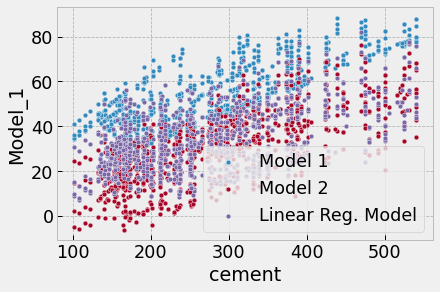

In [101]:
sns.scatterplot(data=model_compare, x="cement", y= "Model_1", label = 'Model 1')
sns.scatterplot(data=model_compare, x="cement", y= "Model_2", label = 'Model 2')
sns.scatterplot(data=model_compare, x="cement", y= "LinReg_Model", label = 'Linear Reg. Model')


<AxesSubplot:xlabel='cement', ylabel='LinReg_Model'>

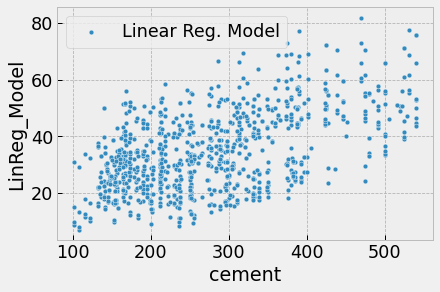

In [102]:
sns.scatterplot(data=model_compare, x="cement", y= "LinReg_Model", label = 'Linear Reg. Model')

<AxesSubplot:xlabel='LinReg_Model'>

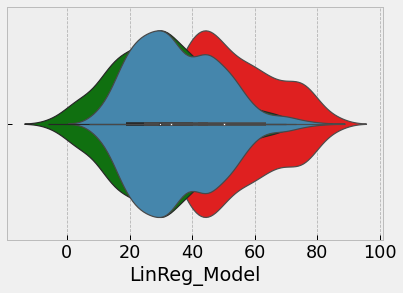

In [103]:
# sns.scatterplot(data=model_compare, x="cement", y= "Model_1")
# sns.scatterplot(data=model_compare, x="cement", y= "Model_2")
# sns.scatterplot(data=model_compare, x="cement", y= "LinReg_Model")

# df1 = sns.load_dataset("model_compare")
# sns.violinplot(x=model_compare["Model_1"])
sns.violinplot(data=model_compare, x= "Model_1", color= 'r')
sns.violinplot(data=model_compare, x= "Model_2", color= 'g')
sns.violinplot(data=model_compare, x= "LinReg_Model")

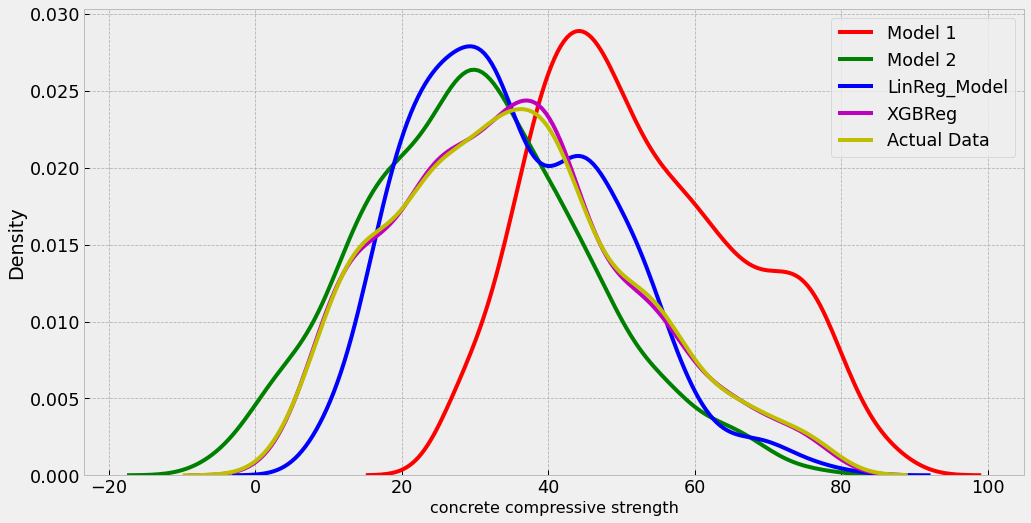

In [104]:
plt.figure(figsize=(15,8))

chart1 = sns.distplot(model_compare['Model_1'] , hist = False, label = 'Model 1', color= 'r', kde_kws={'linewidth': 4})
chart2 = sns.distplot(model_compare['Model_2'] , hist = False, label = 'Model 2', color= 'g', kde_kws={'linewidth': 4})
chart3 = sns.distplot(model_compare['LinReg_Model'] , hist = False, label = 'LinReg_Model', color= 'b', kde_kws={'linewidth': 4})
chart5 = sns.distplot(modelxgb.predict(X) , hist = False, label = 'XGBReg', color= 'm', kde_kws={'linewidth': 4})
chart4 = sns.distplot(concrete_data['concrete_compressive_strength'] , hist = False, label = 'Actual Data', color= 'y', kde_kws={'linewidth': 4})
chart1.set_xlabel('concrete compressive strength', fontsize= 16)

plt.legend()
plt.show()

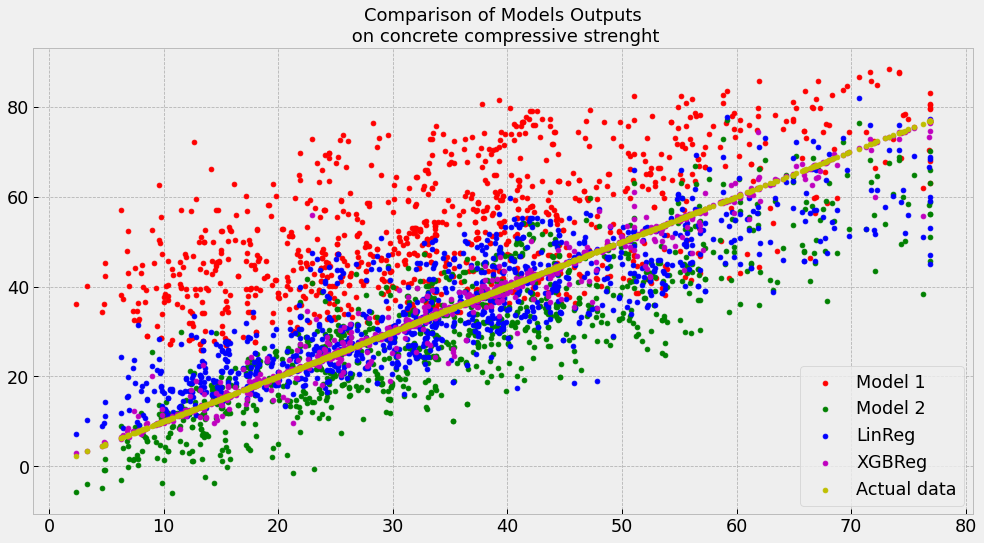

In [109]:
plt.figure(figsize=(15,8))

chart1 = plt.scatter(y, model_compare['Model_1'], label = 'Model 1', color= 'r')
chart2 = plt.scatter(y, model_compare['Model_2'], label = 'Model 2', color= 'g')
chart3 = plt.scatter(y, model_compare['LinReg_Model'], label = 'LinReg', color= 'b')
chart4 = plt.scatter(y, modelxgb.predict(X), label = 'XGBReg', color= 'm')
chart5 = plt.scatter(y, concrete_data['concrete_compressive_strength'], label = 'Actual data', color= 'y')
plt.title('Comparison of Models Outputs\n on concrete compressive strenght', fontsize = 18)
plt.legend()
plt.show()

Text(0.5, 0, 'concrete compressive strength')

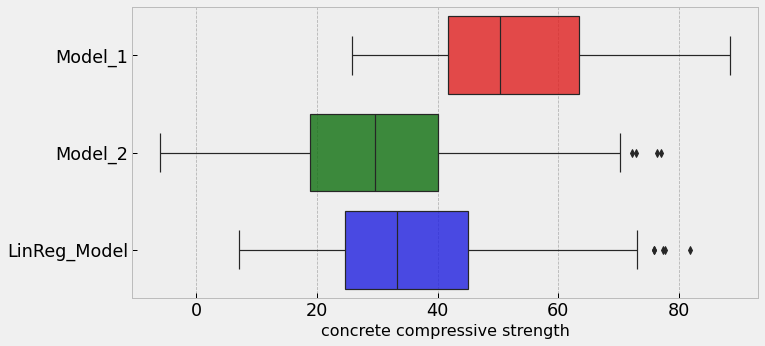

In [108]:
# from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale=2)
my_pal = {"Model_1": "r", "Model_2": "g", "LinReg_Model":"b"}
chart = sns.boxplot(data= model_compare[["Model_1", "Model_2", "LinReg_Model"]],orient="h", palette = my_pal)

# adding transparency to colors
for patch in chart.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, 0.8))

chart.set_xlabel('concrete compressive strength', fontsize= 16)